# **Analyzing the Mortality Trends in the US**

### **Group A4:**
Ali Saadeddine, Jenil Shah, Rishabh Anand, Yu-Fang(Unice) Liao, Shivakumar Vinod, Rishita Chakraborty

# **Table of Contents**
>[Abstract](#scrollTo=ytQmCV0ppjns)

>[Introduction](#scrollTo=NinbPI0pqiO2)

>[Data Information](#scrollTo=3scsZiffgmeZ)

>[Data Exploration and Cleaning](#scrollTo=-fG-8F4RztpC)

>>[How did the level of medical reporting vary across the diseases?](#scrollTo=gx1IZD1B-Zep)

>>[How do we maintain data integrity?](#scrollTo=9KAx-_iG_zXv)

>[Mortality Trends in the US from 2020 to 2023](#scrollTo=5ssOrJ9XqsPV)

>>[No interpretation: What is the time series trend of all causes of death in the US?](#scrollTo=D-NJxC6X09CQ)

>>[No interpretation: How do the top causes of death fluctuate relative to each other?](#scrollTo=lVZ6DEUs1aG7)

>>[How do the top causes of death fluctuate relative to each other in Massachusetts?](#scrollTo=zCNkSuy51xxD)

>>[How do the top causes of death fluctuate relative to seasons across the years?](#scrollTo=2FpSPzVi2K2i)

>[Correlation among Causes of Deaths](#scrollTo=M2hUEJdhrJW7)

>>[How are different causes of deaths realted to each other?](#scrollTo=8RPc0xN82jq9)

>>[How do the yearly trends for various causes of death move relative to each other?](#scrollTo=T2R8IWWr287l)

>[Mortality Trends by Jurisdiction](#scrollTo=dEXVDd6-rvgU)

>>[No interpretation: How does the mortality vary across jurisdictions?](#scrollTo=EiCNTR9v4Cbs)

>>[No interpretation: How do the mortality rates vary amongst the top 5 states over the years?](#scrollTo=QEAkxLyk4L2A)

>>[What are the total number of deaths from all causes by jurisdiction?](#scrollTo=5GvAEoAI5BtC)

>>[No interpretation: How can we geo-visualize the mortality trends across the dates, jurisdictions, and causes?](#scrollTo=1MQUuJDJ57yQ)

>[Analysis of COVID-19 Trends Over Time and Across Jurisdictions](#scrollTo=D2fbKbPjr2pi)

>>[What is the relative death rate from COVID-19 across all jurisdictions?](#scrollTo=g4yWGd4s6EuX)

>>[What density of total mortality across the years is caused by COVID-19?](#scrollTo=tWfRsJaD6Ubf)

>>[How does the COVID-19 mortality vary across regions and seasons?](#scrollTo=orYnm2Do6n-s)

>[Conclusion](#scrollTo=-NN89WF-sOpr)

>[Challenges](#scrollTo=gean389N2dYD)

>[Limitations](#scrollTo=607AhbXk2Qom)

>[Next Steps](#scrollTo=3MZIwrs12qOf)

>[Citations](#scrollTo=kykWV6lbEeA9)



# **Abstract**

This comprehensive study is an exploratory journey of the landscape of mortality in the United States from 2020 to 2023, with a keen focus on uncovering patterns, trends, and anomalies. Utilizing a robust dataset encompassing various causes of death, the research employs data cleaning, statistical analyses, and compelling visualizations. Key visualizations include an insightful portrayal of missing data, a time series analysis of mortality due to all causes contrasted with significant COVID-19 events, and a comparative study of deaths attributable to leading diseases. The study unveils surprising trends and correlations, particularly highlighting the profound impact of the COVID-19 pandemic and its various stages on mortality. Furthermore, it delves into the comparative deadliness of diseases over time, offering crucial insights that could guide public health policies, crisis preparedness, and medical research.

# **Introduction**

The realm of public health has been challenged in recent years, with the advent of the COVID-19 pandemic fundamentally altering the dynamics of diseases and mortality. In light of these developments, our study aims to dissect mortality trends in the United States from 2020 to 2023, probing into the various causes of death and their evolution over time. Through a rigorous process of data cleaning and validation, we confront the challenges posed by missing and incomplete data, ensuring the integrity of our analysis. Our approach utilizes the power of visual analytics to illustrate trends and patterns, drawing deep connections between significant pandemic milestones and national mortality rates. By contrasting the lethality of different diseases throughout the study period, we seek to unravel the broader implications of these mortality trends for public health and safety.

# **Data Information**

***A brief summary of the dataset used are as follows:***

| Dataframe Name     | Brief Description |
| ----------- | ----------- |
| `data_as_of` | Date of recorded deaths       |
| `juris_occur`   | State of occurrence  |
| `mmwr_yr` | Morbidity and Mortality Weekly Report Year Information|
| `mmwr_week` | Morbidity and Mortality Weekly Report Week Information | |
` all_cause` | Includes Death Count due to All Causes |
| `NC` | Includes Death Count due to Natural Causes | |
| `MN` | Includes Death Count due to Malignant neoplasms   | |
| `diabetes` | Includes Death Count due to Diabetes mellitus  | |
| `AD` | Includes Death Count due to Alzheimer disease  | |
| `CLRD` | Includes Death Count due to Chronic lower respiratory diseases | |
| `heart` | Includes Death Count due to Diseases of heart  | |
| `CD` | Includes Death Count due to Cerebrovascular diseases | |
| `covid19_multi` | Includes Death Count due to COVID-19 (Multiple Cause of Death)  | |
| `covid19_underly` | Includes Death Count due to COVID-19 (Underlying Cause of Death)   | |


# **Data Exploration and Cleaning**

In [ ]:
# Import libraries and mount Google Drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
!pip install plotly_express -q
import plotly_express as px
import geopandas as gpd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Install Dash to make the choropleth map
!pip install dash -q
from dash import Dash, dcc, html
from dash.dependencies import Input, Output

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

In [ ]:
# Read the csv file
data = pd.read_csv("/content/drive/MyDrive/BA780_TeamProject/Weekly_Provisional_Counts_of_Deaths_by_State_and_Select_Causes__2020-2023.csv")

In [ ]:
# Show the top 5 rows of the dataset
data.head()

,Data As Of,Jurisdiction of Occurrence,MMWR Year,MMWR Week,Week Ending Date,All Cause,Natural Cause,Septicemia (A40-A41),Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),...,flag_alz,flag_inflpn,flag_clrd,flag_otherresp,flag_nephr,flag_otherunk,flag_hd,flag_stroke,flag_cov19mcod,flag_cov19ucod
0,09/20/2023,United States,2020,1,2020-01-04,60170.0,55005.0,843.0,11567.0,1829.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,09/20/2023,United States,2020,2,2020-01-11,60735.0,55754.0,861.0,11962.0,1942.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,09/20/2023,United States,2020,3,2020-01-18,59363.0,54517.0,829.0,11702.0,1819.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,09/20/2023,United States,2020,4,2020-01-25,59162.0,54401.0,828.0,11879.0,1864.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,09/20/2023,United States,2020,5,2020-02-01,58843.0,54006.0,811.0,11963.0,1828.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# The percentage of missing values of each columns
missing_value_perc = round(100 * (data.isnull().sum()/len(data)),2)
print("The percentage of missing values of each columns: \n\n",missing_value_perc)

The percentage of missing values of each columns: 

 Data As Of                                                                                            0.00
Jurisdiction of Occurrence                                                                            0.00
MMWR Year                                                                                             0.00
MMWR Week                                                                                             0.00
Week Ending Date                                                                                      0.00
All Cause                                                                                             0.01
Natural Cause                                                                                         0.01
Septicemia (A40-A41)                                                                                 42.00
Malignant neoplasms (C00-C97)                                                              

In [ ]:
# Usable data name: print the index(name) of data in which missing value percentage < 35%
usable_data_name = missing_value_perc[missing_value_perc < 35].index

# Usable data: missing value percentage < 35%
cleaned_data = data[usable_data_name]

In [ ]:
missing_values = cleaned_data.isnull().sum()
missing_values

missing_values_1 = missing_values.drop(["Data As Of", "MMWR Year", "MMWR Week", "Week Ending Date"])
missing_values_sorted = missing_values_1.sort_values(ascending = False)

## **How did the level of medical reporting vary across the diseases?**

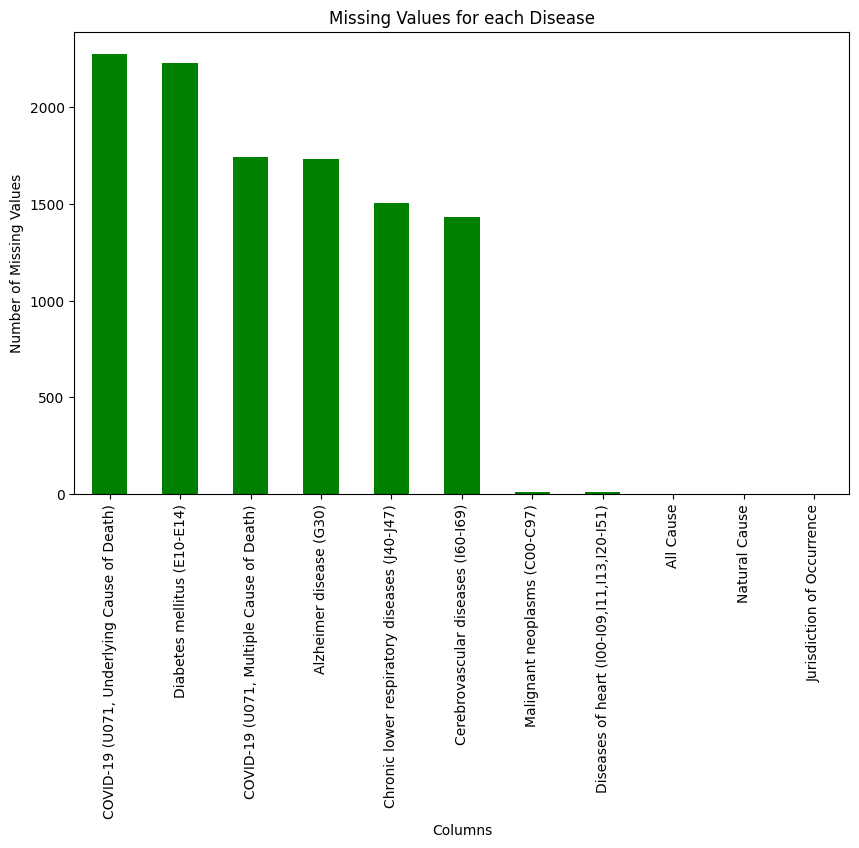

In [ ]:
# plot for missing values for each Disease

plt.figure(figsize=(10, 6))
missing_values_sorted.plot(kind='bar', color='green')
plt.title('Missing Values for each Disease')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=90)
plt.show()

Regarding data completeness, there are notable gaps in reporting for six specific diseases. Notably, the data related to COVID-19, particularly under the categories COVID-19 (U071, Underlying Cause of Death) and COVID-19 (U071, Underlying Cause of Death), as well as Diabetes, exhibit the highest number of missing values, amounting to approximately 1700 cases. Alzheimer's disease, Chronic Lower Respiratory Diseases, and Cerebrovascular Diseases follow closely in terms of missing data.

## **How do we maintain data integrity?**

In [ ]:
# Print column names before renaming
print("Column names before renaming:")
print(cleaned_data.columns)

# Perform the renaming
cleaned_data.rename(columns={
    "data_as_of": "Data As Of",
    "juris_occur": "Jurisdiction of Occurrence",
    "mmwr_yr": "MMWR Year",
    "mmwr_week": "MMWR Week",
    "week_end_date": "Week Ending Date",
    "all_cause": "All Cause",
    "NC": "Natural Cause",
    "MN": "Malignant neoplasms (C00-C97)",
    "diabetes": "Diabetes mellitus (E10-E14)",
    "AD": "Alzheimer disease (G30)",
    "CLRD": "Chronic lower respiratory diseases (J40-J47)",
    "heart": "Diseases of heart (I00-I09,I11,I13,I20-I51)",
    "CD": "Cerebrovascular diseases (I60-I69)",
    "covid19_multi": "COVID-19 (U071, Multiple Cause of Death)",
    "covid19_underly": "COVID-19 (U071, Underlying Cause of Death)"
}, inplace=True)

# Print column names after renaming
print("Column names after renaming:")
print(cleaned_data.columns)


Column names before renaming:
Index(['Data As Of', 'Jurisdiction of Occurrence', 'MMWR Year', 'MMWR Week',
       'Week Ending Date', 'All Cause', 'Natural Cause',
       'Malignant neoplasms (C00-C97)', 'Diabetes mellitus (E10-E14)',
       'Alzheimer disease (G30)',
       'Chronic lower respiratory diseases (J40-J47)',
       'Diseases of heart (I00-I09,I11,I13,I20-I51)',
       'Cerebrovascular diseases (I60-I69)',
       'COVID-19 (U071, Multiple Cause of Death)',
       'COVID-19 (U071, Underlying Cause of Death)'],
      dtype='object')
Column names after renaming:
Index(['Data As Of', 'Jurisdiction of Occurrence', 'MMWR Year', 'MMWR Week',
       'Week Ending Date', 'All Cause', 'Natural Cause',
       'Malignant neoplasms (C00-C97)', 'Diabetes mellitus (E10-E14)',
       'Alzheimer disease (G30)',
       'Chronic lower respiratory diseases (J40-J47)',
       'Diseases of heart (I00-I09,I11,I13,I20-I51)',
       'Cerebrovascular diseases (I60-I69)',
       'COVID-19 (U071, Mult

In [ ]:
cleaned_data

,Data As Of,Jurisdiction of Occurrence,MMWR Year,MMWR Week,Week Ending Date,All Cause,Natural Cause,Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),Alzheimer disease (G30),Chronic lower respiratory diseases (J40-J47),"Diseases of heart (I00-I09,I11,I13,I20-I51)",Cerebrovascular diseases (I60-I69),"COVID-19 (U071, Multiple Cause of Death)","COVID-19 (U071, Underlying Cause of Death)"
0,09/20/2023,United States,2020,1,2020-01-04,60170.0,55005.0,11567.0,1829.0,2537.0,3500.0,14202.0,3110.0,0.0,0.0
1,09/20/2023,United States,2020,2,2020-01-11,60735.0,55754.0,11962.0,1942.0,2566.0,3708.0,13911.0,3189.0,1.0,1.0
2,09/20/2023,United States,2020,3,2020-01-18,59363.0,54517.0,11702.0,1819.0,2491.0,3526.0,13593.0,3256.0,2.0,1.0
3,09/20/2023,United States,2020,4,2020-01-25,59162.0,54401.0,11879.0,1864.0,2517.0,3403.0,13612.0,3185.0,3.0,2.0
4,09/20/2023,United States,2020,5,2020-02-01,58843.0,54006.0,11963.0,1828.0,2480.0,3314.0,13467.0,3084.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10417,09/20/2023,Puerto Rico,2023,32,2023-08-12,629.0,605.0,132.0,60.0,57.0,19.0,104.0,17.0,15.0,14.0
10418,09/20/2023,Puerto Rico,2023,33,2023-08-19,606.0,585.0,91.0,48.0,48.0,15.0,111.0,26.0,15.0,12.0
10419,09/20/2023,Puerto Rico,2023,34,2023-08-26,642.0,613.0,109.0,47.0,60.0,15.0,118.0,30.0,21.0,18.0
10420,09/20/2023,Puerto Rico,2023,35,2023-09-02,534.0,516.0,90.0,67.0,57.0,13.0,95.0,20.0,14.0,10.0


In [ ]:
#Filter each DataFrame on the basis of year
#2020
year_2020 =cleaned_data.loc[cleaned_data['MMWR Year'] == 2020]
year_2020_mean= year_2020.mean(skipna=True)
#2021
year_2021 =cleaned_data.loc[cleaned_data['MMWR Year'] == 2021]
year_2021_mean = year_2021.mean(skipna=True)
#2022
year_2022 =cleaned_data.loc[cleaned_data['MMWR Year'] == 2022]
year_2022_mean = year_2022.mean(skipna=True)
#2023
year_2023 =cleaned_data.loc[cleaned_data['MMWR Year'] == 2023]
year_2023_mean = year_2023.mean(skipna=True)

In [ ]:
#Find the column missing values in the years
#Replace missing values in each year with the corresponding mean
cleaned_data.loc[cleaned_data['MMWR Year'] == 2020] = cleaned_data.loc[cleaned_data['MMWR Year'] == 2020].fillna(year_2020_mean)
cleaned_data.loc[cleaned_data['MMWR Year'] == 2021] = cleaned_data.loc[cleaned_data['MMWR Year'] == 2021].fillna(year_2021_mean)
cleaned_data.loc[cleaned_data['MMWR Year'] == 2022] = cleaned_data.loc[cleaned_data['MMWR Year'] == 2022].fillna(year_2022_mean)
cleaned_data.loc[cleaned_data['MMWR Year'] == 2023] = cleaned_data.loc[cleaned_data['MMWR Year'] == 2023].fillna(year_2023_mean)

In [ ]:
#Create a new 'Month' column with month names in abbreviated format
cleaned_data['Week Ending Date'] = pd.to_datetime(cleaned_data['Week Ending Date'], dayfirst=True).dt.strftime("%d/%m/%Y")
cleaned_data['Month'] = pd.to_datetime(cleaned_data['Week Ending Date'],dayfirst=True).dt.strftime("%b")

cleaned_data.head(20)

,Data As Of,Jurisdiction of Occurrence,MMWR Year,MMWR Week,Week Ending Date,All Cause,Natural Cause,Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),Alzheimer disease (G30),Chronic lower respiratory diseases (J40-J47),"Diseases of heart (I00-I09,I11,I13,I20-I51)",Cerebrovascular diseases (I60-I69),"COVID-19 (U071, Multiple Cause of Death)","COVID-19 (U071, Underlying Cause of Death)",Month
0,09/20/2023,United States,2020,1,04/01/2020,60170.0,55005.0,11567.0,1829.0,2537.0,3500.0,14202.0,3110.0,0.0,0.0,Jan
1,09/20/2023,United States,2020,2,11/01/2020,60735.0,55754.0,11962.0,1942.0,2566.0,3708.0,13911.0,3189.0,1.0,1.0,Jan
2,09/20/2023,United States,2020,3,18/01/2020,59363.0,54517.0,11702.0,1819.0,2491.0,3526.0,13593.0,3256.0,2.0,1.0,Jan
3,09/20/2023,United States,2020,4,25/01/2020,59162.0,54401.0,11879.0,1864.0,2517.0,3403.0,13612.0,3185.0,3.0,2.0,Jan
4,09/20/2023,United States,2020,5,01/02/2020,58843.0,54006.0,11963.0,1828.0,2480.0,3314.0,13467.0,3084.0,0.0,0.0,Feb
5,09/20/2023,United States,2020,6,08/02/2020,59482.0,54411.0,11704.0,1957.0,2515.0,3413.0,14001.0,3056.0,4.0,3.0,Feb
6,09/20/2023,United States,2020,7,15/02/2020,58824.0,53974.0,11807.0,1848.0,2537.0,3477.0,13645.0,3089.0,6.0,2.0,Feb
7,09/20/2023,United States,2020,8,22/02/2020,58912.0,53987.0,11780.0,1880.0,2515.0,3454.0,13632.0,3083.0,6.0,6.0,Feb
8,09/20/2023,United States,2020,9,29/02/2020,59334.0,54316.0,11790.0,1831.0,2519.0,3460.0,13714.0,3126.0,9.0,9.0,Feb
9,09/20/2023,United States,2020,10,07/03/2020,59694.0,54386.0,11712.0,1867.0,2511.0,3470.0,13684.0,3097.0,38.0,34.0,Mar


In [ ]:
#Select the column from present location
month_column = cleaned_data['Month']

#Remove the 'Month' column from its current position
cleaned_data.drop(columns=['Month'], inplace=True)

#Insert the 'Month' column into the fourth location
cleaned_data.insert(4, 'Month', month_column)
cleaned_data.head(50)

,Data As Of,Jurisdiction of Occurrence,MMWR Year,MMWR Week,Month,Week Ending Date,All Cause,Natural Cause,Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),Alzheimer disease (G30),Chronic lower respiratory diseases (J40-J47),"Diseases of heart (I00-I09,I11,I13,I20-I51)",Cerebrovascular diseases (I60-I69),"COVID-19 (U071, Multiple Cause of Death)","COVID-19 (U071, Underlying Cause of Death)"
0,09/20/2023,United States,2020,1,Jan,04/01/2020,60170.0,55005.0,11567.0,1829.0,2537.0,3500.0,14202.0,3110.0,0.0,0.0
1,09/20/2023,United States,2020,2,Jan,11/01/2020,60735.0,55754.0,11962.0,1942.0,2566.0,3708.0,13911.0,3189.0,1.0,1.0
2,09/20/2023,United States,2020,3,Jan,18/01/2020,59363.0,54517.0,11702.0,1819.0,2491.0,3526.0,13593.0,3256.0,2.0,1.0
3,09/20/2023,United States,2020,4,Jan,25/01/2020,59162.0,54401.0,11879.0,1864.0,2517.0,3403.0,13612.0,3185.0,3.0,2.0
4,09/20/2023,United States,2020,5,Feb,01/02/2020,58843.0,54006.0,11963.0,1828.0,2480.0,3314.0,13467.0,3084.0,0.0,0.0
5,09/20/2023,United States,2020,6,Feb,08/02/2020,59482.0,54411.0,11704.0,1957.0,2515.0,3413.0,14001.0,3056.0,4.0,3.0
6,09/20/2023,United States,2020,7,Feb,15/02/2020,58824.0,53974.0,11807.0,1848.0,2537.0,3477.0,13645.0,3089.0,6.0,2.0
7,09/20/2023,United States,2020,8,Feb,22/02/2020,58912.0,53987.0,11780.0,1880.0,2515.0,3454.0,13632.0,3083.0,6.0,6.0
8,09/20/2023,United States,2020,9,Feb,29/02/2020,59334.0,54316.0,11790.0,1831.0,2519.0,3460.0,13714.0,3126.0,9.0,9.0
9,09/20/2023,United States,2020,10,Mar,07/03/2020,59694.0,54386.0,11712.0,1867.0,2511.0,3470.0,13684.0,3097.0,38.0,34.0


In [ ]:
cleaned_data_withoutUS = cleaned_data[cleaned_data["Jurisdiction of Occurrence"] != "United States"]
cleaned_data_withoutUS

,Data As Of,Jurisdiction of Occurrence,MMWR Year,MMWR Week,Month,Week Ending Date,All Cause,Natural Cause,Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),Alzheimer disease (G30),Chronic lower respiratory diseases (J40-J47),"Diseases of heart (I00-I09,I11,I13,I20-I51)",Cerebrovascular diseases (I60-I69),"COVID-19 (U071, Multiple Cause of Death)","COVID-19 (U071, Underlying Cause of Death)"
193,09/20/2023,Alabama,2020,1,Jan,04/01/2020,1082.0,1009.0,196.0,25.0,54.0,86.0,268.0,81.0,0.000000,0.0
194,09/20/2023,Alabama,2020,2,Jan,11/01/2020,1127.0,1060.0,197.0,17.0,41.0,72.0,274.0,68.0,0.000000,0.0
195,09/20/2023,Alabama,2020,3,Jan,18/01/2020,1039.0,976.0,201.0,24.0,53.0,73.0,239.0,45.0,0.000000,0.0
196,09/20/2023,Alabama,2020,4,Jan,25/01/2020,1056.0,982.0,190.0,23.0,54.0,61.0,284.0,70.0,310.024063,0.0
197,09/20/2023,Alabama,2020,5,Feb,01/02/2020,1026.0,949.0,157.0,16.0,58.0,76.0,265.0,55.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10417,09/20/2023,Puerto Rico,2023,32,Aug,12/08/2023,629.0,605.0,132.0,60.0,57.0,19.0,104.0,17.0,15.000000,14.0
10418,09/20/2023,Puerto Rico,2023,33,Aug,19/08/2023,606.0,585.0,91.0,48.0,48.0,15.0,111.0,26.0,15.000000,12.0
10419,09/20/2023,Puerto Rico,2023,34,Aug,26/08/2023,642.0,613.0,109.0,47.0,60.0,15.0,118.0,30.0,21.000000,18.0
10420,09/20/2023,Puerto Rico,2023,35,Sep,02/09/2023,534.0,516.0,90.0,67.0,57.0,13.0,95.0,20.0,14.000000,10.0


Upon loading the dataset, the script calculates the proportion of missing (null) values in each column. This step is crucial for assessing data quality and determining the feasibility of analyses or predictions that can be performed on the dataset.

Recognizing the detrimental impact of excessive missing values on data reliability and model performance, the script filters out any columns where more than 35% of the values are missing. This threshold is a subjective choice and can be adjusted based on the context and the level of data sparsity that's considered acceptable for the subsequent analysis.

For the columns that are retained, the script replaces missing values with the mean of the respective columns, a common imputation technique that helps maintain the overall data distribution. This replacement is done only for numeric columns, as mean imputation doesn't apply to non-numeric data (e.g., categorical or string data).

Finally, the script displays the initial rows of the cleaned dataset and recalculates the proportion of missing values to verify the effectiveness of the cleaning process, ensuring that no null values remain. This end-to-end cleaning process is fundamental in data science and machine learning workflows to ensure data integrity and improve the validity of the insights or predictions generated from the data.

# **Mortality Trends in the US from 2020 to 2023**

## **What is the time series trend of all causes of death in the US?**


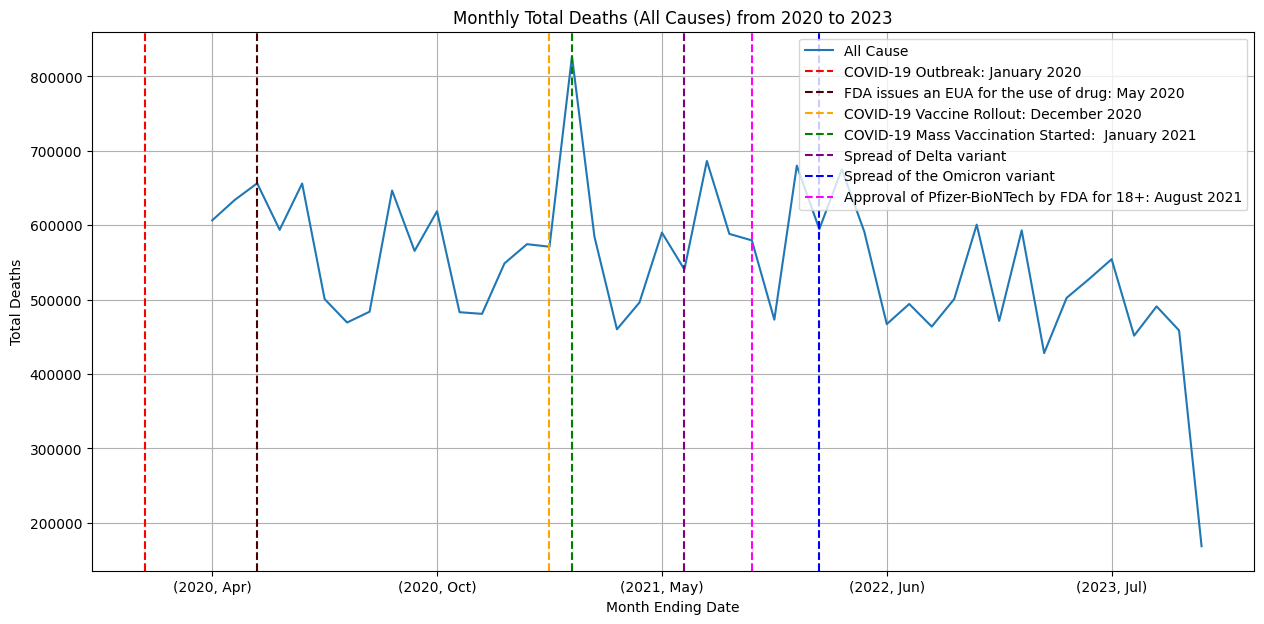

In [ ]:
plt.figure(figsize=(15, 7))
x = cleaned_data.sort_values("All Cause", ascending=False)
cleaned_data.groupby(['MMWR Year','Month'])['All Cause'].sum().plot()

# Marking significant events
covid_start_month = (2020, -3)
emergency_use_month = (2020, 2)
covid_vaccine_rollout_month = (2021, 3)
covid_mass_vaccination_start_month = (2021, 4)
delta_spread_month = (2021, 9)
pfizer_approved_month = (2021, 12)
omicron_spread_month = (2022, 3)

# Converting the year and month into a month ordinal for labeling specific months on the chart
def convert_to_month_num(year, month):
    return (year - 2020) * 12 + month

plt.axvline(x=convert_to_month_num(*covid_start_month), color='red', linestyle='--', label='COVID-19 Outbreak: January 2020')
plt.axvline(x=convert_to_month_num(*emergency_use_month), color='#4a0100', linestyle='--', label='FDA issues an EUA for the use of drug: May 2020')
plt.axvline(x=convert_to_month_num(*covid_vaccine_rollout_month), color='orange', linestyle='--', label='COVID-19 Vaccine Rollout: December 2020')
plt.axvline(x=convert_to_month_num(*covid_mass_vaccination_start_month), color='green', linestyle='--', label='COVID-19 Mass Vaccination Started:  January 2021')
plt.axvline(x=convert_to_month_num(*delta_spread_month), color='purple', linestyle='--', label='Spread of Delta variant')
plt.axvline(x=convert_to_month_num(*omicron_spread_month), color='blue', linestyle='--', label='Spread of the Omicron variant')
plt.axvline(x=convert_to_month_num(*pfizer_approved_month), color='magenta', linestyle='--', label='Approval of Pfizer-BioNTech by FDA for 18+: August 2021')

plt.title('Monthly Total Deaths (All Causes) from 2020 to 2023')
plt.xlabel('Month Ending Date')
plt.ylabel('Total Deaths')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()


We observe time trend with the outbreak of Covid 19 from its outbreak year Jan 2020 doesnot have significant impact initially but  till the end of December it crosses 800000 Total Deaths which includes the impact of covid.There is decrease in the number of deaths post 2023 July one of reasons may be efficiency of the vaccines.

## **How do the top causes of death fluctuate relative to each other?**

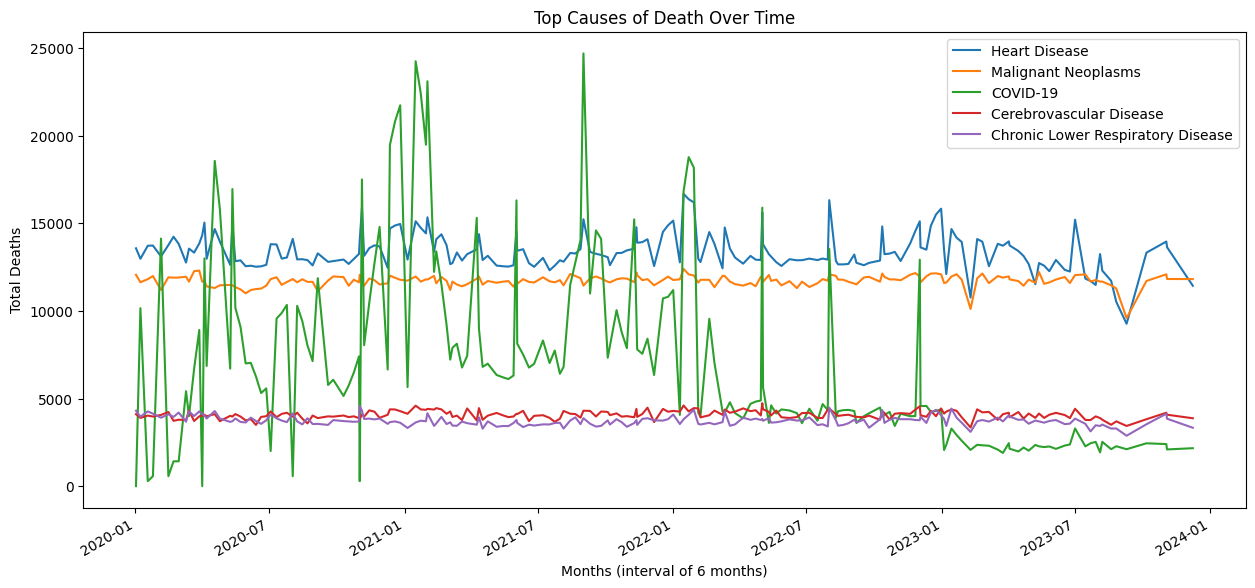

In [ ]:
cleaned_data_withoutUS = cleaned_data[cleaned_data["Jurisdiction of Occurrence"] != "United States"]
cleaned_data_withoutUS['Week Ending Date'] = pd.to_datetime(cleaned_data_withoutUS['Week Ending Date'])

# Create a new figure

causes = ['Diseases of heart (I00-I09,I11,I13,I20-I51)', 'Malignant neoplasms (C00-C97)',
          'COVID-19 (U071, Underlying Cause of Death)', 'Cerebrovascular diseases (I60-I69)',
          'Chronic lower respiratory diseases (J40-J47)']
legend_labels = {
    'Diseases of heart (I00-I09,I11,I13,I20-I51)': 'Heart Disease',
    'Malignant neoplasms (C00-C97)': 'Malignant Neoplasms',
    'COVID-19 (U071, Underlying Cause of Death)': 'COVID-19',
    'Cerebrovascular diseases (I60-I69)': 'Cerebrovascular Disease',
    'Chronic lower respiratory diseases (J40-J47)':'Chronic Lower Respiratory Disease'
}
plt.figure(figsize=(15, 7))
for cause in causes:
    cleaned_data_withoutUS.groupby('Week Ending Date')[cause].sum().plot(label=legend_labels.get(cause, cause))
plt.title('Top Causes of Death Over Time')
plt.xlabel('Months (interval of 6 months)')
plt.ylabel('Total Deaths')
plt.legend()
plt.show()

The Graph shows the top causes of death over a period of 6 months for all the diseases.
Heart disease, Malignant Neoplasms, COVID-19, Cerebrovascular diseases, Chronic Lower Respiratory disease. The initial deaths   for heart diseases there was but because of covid 19 outbreak there was huge fluctuation and it continued till mid of 2021 at the peak. Later from 2023 onwards the rate of deaths reported were less because of immunization. Malignant deaths remain same all across the years.

## **How do the top causes of death fluctuate relative to each other in Massachusetts?**

In [ ]:
# Define top_states based on total deaths across the years
top_states = cleaned_data_withoutUS.groupby('Jurisdiction of Occurrence')['All Cause'].sum().nlargest(7).index.tolist()

# Create a color palette for the bars
colors = sns.color_palette('viridis', len(top_states))

# Initialize lists to store the total deaths for each state and year
total_deaths_by_state_2020 = []
total_deaths_by_state_2021 = []
total_deaths_by_state_2022 = []
total_deaths_by_state_2023 = []

# Iterate through the states and calculate total deaths for each year and append it in the total_deaths_by_state_20XX list
for state in top_states:
    state_data_2020 = cleaned_data_withoutUS[(cleaned_data_withoutUS['MMWR Year'] == 2020) & (cleaned_data_withoutUS['Jurisdiction of Occurrence'] == state)]
    state_data_2021 = cleaned_data_withoutUS[(cleaned_data_withoutUS['MMWR Year'] == 2021) & (cleaned_data_withoutUS['Jurisdiction of Occurrence'] == state)]
    state_data_2022 = cleaned_data_withoutUS[(cleaned_data_withoutUS['MMWR Year'] == 2022) & (cleaned_data_withoutUS['Jurisdiction of Occurrence'] == state)]
    state_data_2023 = cleaned_data_withoutUS[(cleaned_data_withoutUS['MMWR Year'] == 2023) & (cleaned_data_withoutUS['Jurisdiction of Occurrence'] == state)]
    total_deaths_2020 = state_data_2020['All Cause'].sum()
    total_deaths_2021 = state_data_2021['All Cause'].sum()
    total_deaths_2022 = state_data_2022['All Cause'].sum()
    total_deaths_2023 = state_data_2023['All Cause'].sum()
    total_deaths_by_state_2020.append(total_deaths_2020)
    total_deaths_by_state_2021.append(total_deaths_2021)
    total_deaths_by_state_2022.append(total_deaths_2022)
    total_deaths_by_state_2023.append(total_deaths_2023)


In [ ]:
#ma_data_without_US = cleaned_data[cleaned_data['Jurisdiction of Occurrence'] != 'United States']
ma_data_without_US = cleaned_data[(cleaned_data["Jurisdiction of Occurrence"] != 'United States') &
             (cleaned_data["Jurisdiction of Occurrence"] != 'Puerto Rico')]
ma_data_without_US

,Data As Of,Jurisdiction of Occurrence,MMWR Year,MMWR Week,Month,Week Ending Date,All Cause,Natural Cause,Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),Alzheimer disease (G30),Chronic lower respiratory diseases (J40-J47),"Diseases of heart (I00-I09,I11,I13,I20-I51)",Cerebrovascular diseases (I60-I69),"COVID-19 (U071, Multiple Cause of Death)","COVID-19 (U071, Underlying Cause of Death)"
193,09/20/2023,Alabama,2020,1,Jan,04/01/2020,1082.0,1009.0,196.0,25.000000,54.000000,86.000000,268.000000,81.000000,0.000000,0.000000
194,09/20/2023,Alabama,2020,2,Jan,11/01/2020,1127.0,1060.0,197.0,17.000000,41.000000,72.000000,274.000000,68.000000,0.000000,0.000000
195,09/20/2023,Alabama,2020,3,Jan,18/01/2020,1039.0,976.0,201.0,24.000000,53.000000,73.000000,239.000000,45.000000,0.000000,0.000000
196,09/20/2023,Alabama,2020,4,Jan,25/01/2020,1056.0,982.0,190.0,23.000000,54.000000,61.000000,284.000000,70.000000,310.024063,0.000000
197,09/20/2023,Alabama,2020,5,Feb,01/02/2020,1026.0,949.0,157.0,16.000000,58.000000,76.000000,265.000000,55.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10224,09/20/2023,Wyoming,2023,32,Aug,12/08/2023,119.0,106.0,24.0,83.757776,95.457161,118.161349,28.000000,129.954518,0.000000,59.565854
10225,09/20/2023,Wyoming,2023,33,Aug,19/08/2023,115.0,109.0,32.0,83.757776,95.457161,118.161349,15.000000,129.954518,77.113402,59.565854
10226,09/20/2023,Wyoming,2023,34,Aug,26/08/2023,71.0,67.0,11.0,83.757776,95.457161,118.161349,14.000000,129.954518,77.113402,59.565854
10227,09/20/2023,Wyoming,2023,35,Sep,02/09/2023,67.0,67.0,19.0,83.757776,95.457161,118.161349,469.722251,129.954518,0.000000,0.000000


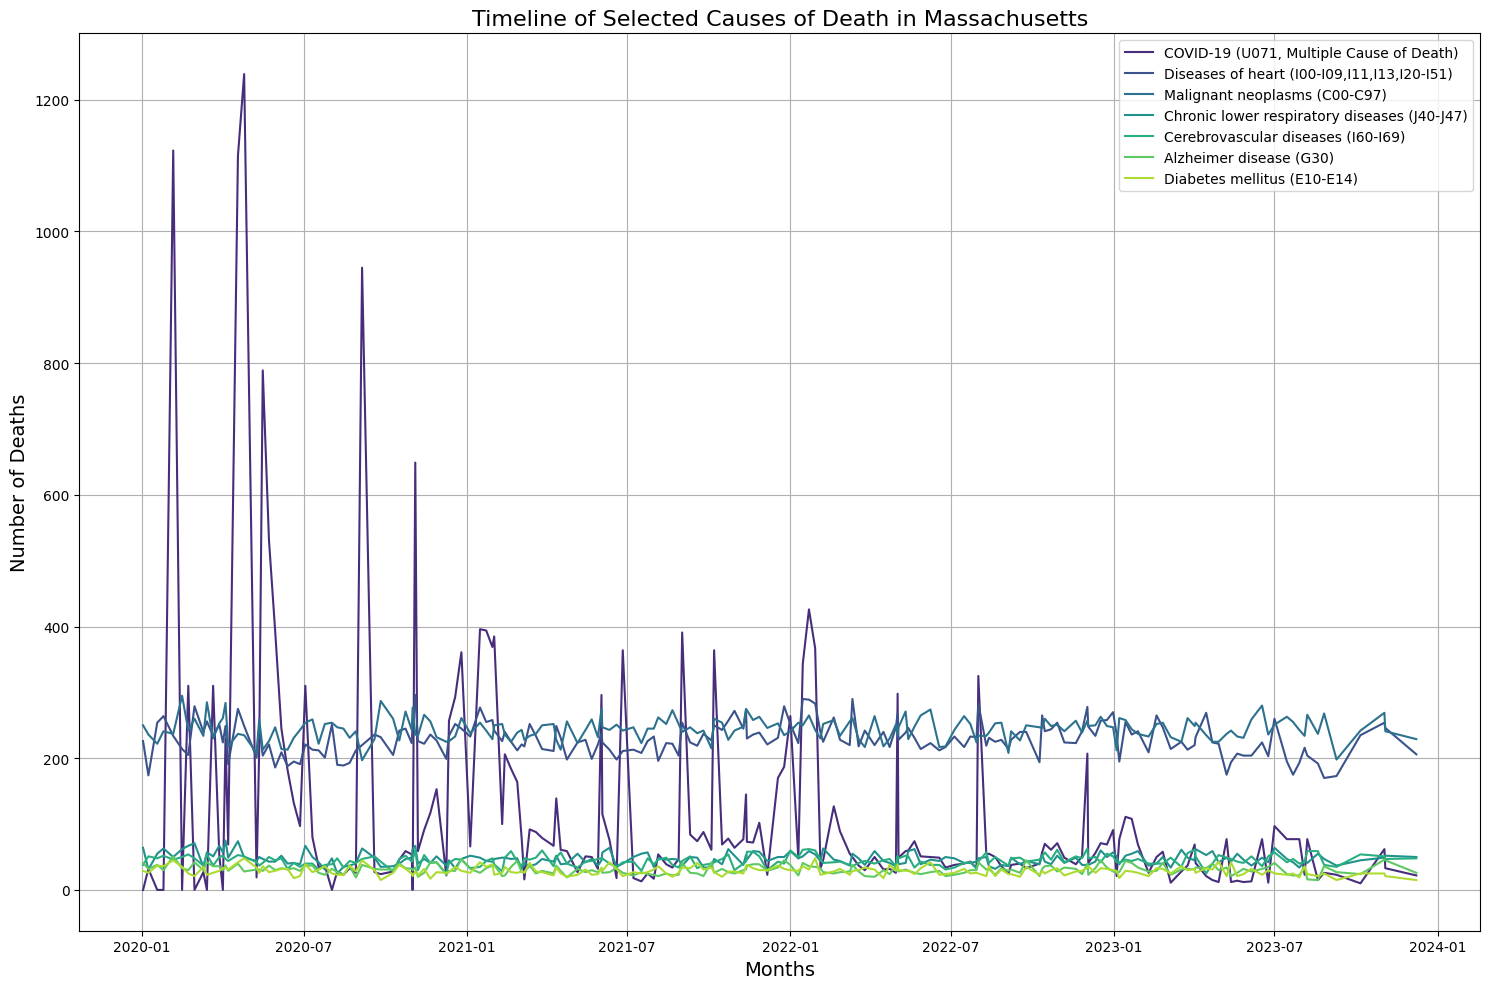

In [ ]:
cleaned_data['Week Ending Date'] = pd.to_datetime(cleaned_data['Week Ending Date'])

# Data preparation for Massachusetts (MA)
ma_data = cleaned_data[cleaned_data['Jurisdiction of Occurrence'] == 'Massachusetts']

# We will focus on the same major causes of death as before for consistency
selected_causes_ma = [
    'COVID-19 (U071, Multiple Cause of Death)',
    'Diseases of heart (I00-I09,I11,I13,I20-I51)',
    'Malignant neoplasms (C00-C97)',
    'Chronic lower respiratory diseases (J40-J47)',
    'Cerebrovascular diseases (I60-I69)',
    'Alzheimer disease (G30)',
    'Diabetes mellitus (E10-E14)'
]

# Selecting data for the plot
ma_time_series_data = ma_data.groupby('Week Ending Date').sum()[selected_causes_ma]

# Create line charts for each cause of death in MA
plt.figure(figsize=(15, 10))
for cause, color in zip(ma_time_series_data.columns, colors[:len(selected_causes_ma)]):
    plt.plot(ma_time_series_data.index, ma_time_series_data[cause], label=cause, color=color)

# Formatting the chart
plt.title('Timeline of Selected Causes of Death in Massachusetts', fontsize=16)
plt.xlabel('Months', fontsize=14)
plt.ylabel('Number of Deaths', fontsize=14)
plt.legend(loc='upper right')
plt.grid(visible=True)
plt.tight_layout()

plt.show()


The visualization presents line charts depicting the number of deaths for selected major causes over time, specifically within Massachusetts. This state-level analysis allows us to observe trends, spikes, or anomalies in death rates.

Key insights:

COVID-19 Trends: Similar to the national trend, Massachusetts experienced significant spikes in COVID-19 deaths. These spikes correspond to known increases in cases during certain periods, highlighting the severe impact of COVID-19 surges on the state.

Comparison with Other Causes: While COVID-19 shows pronounced spikes, other causes of death, such as diseases of the heart, malignant neoplasms, and diabetes mellitus, demonstrate more stable but persistent trends. This persistence underscores the ongoing impact of these health issues beyond the pandemic.

Potential for Targeted Interventions: Understanding these trends is crucial for state health officials and policymakers. It provides a clear picture of the health challenges faced by the population, informing targeted public health responses, resource allocation, and policy development.

Significance of Temporal Analysis: This timeline emphasizes the importance of longitudinal data analysis in public health. It helps in understanding how health challenges evolve over time and in evaluating the effectiveness of interventions.

This visualization serves as a powerful tool for state-level health departments, researchers, and policymakers, helping them understand temporal mortality patterns and guiding strategy development.



## **How do the top causes of death fluctuate relative to seasons across the years?**

In [ ]:
seasonal_data = cleaned_data.copy()
seasonal_data

,Data As Of,Jurisdiction of Occurrence,MMWR Year,MMWR Week,Month,Week Ending Date,All Cause,Natural Cause,Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),Alzheimer disease (G30),Chronic lower respiratory diseases (J40-J47),"Diseases of heart (I00-I09,I11,I13,I20-I51)",Cerebrovascular diseases (I60-I69),"COVID-19 (U071, Multiple Cause of Death)","COVID-19 (U071, Underlying Cause of Death)"
0,09/20/2023,United States,2020,1,Jan,2020-04-01,60170.0,55005.0,11567.0,1829.0,2537.0,3500.0,14202.0,3110.0,0.0,0.0
1,09/20/2023,United States,2020,2,Jan,2020-11-01,60735.0,55754.0,11962.0,1942.0,2566.0,3708.0,13911.0,3189.0,1.0,1.0
2,09/20/2023,United States,2020,3,Jan,2020-01-18,59363.0,54517.0,11702.0,1819.0,2491.0,3526.0,13593.0,3256.0,2.0,1.0
3,09/20/2023,United States,2020,4,Jan,2020-01-25,59162.0,54401.0,11879.0,1864.0,2517.0,3403.0,13612.0,3185.0,3.0,2.0
4,09/20/2023,United States,2020,5,Feb,2020-01-02,58843.0,54006.0,11963.0,1828.0,2480.0,3314.0,13467.0,3084.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10417,09/20/2023,Puerto Rico,2023,32,Aug,2023-12-08,629.0,605.0,132.0,60.0,57.0,19.0,104.0,17.0,15.0,14.0
10418,09/20/2023,Puerto Rico,2023,33,Aug,2023-08-19,606.0,585.0,91.0,48.0,48.0,15.0,111.0,26.0,15.0,12.0
10419,09/20/2023,Puerto Rico,2023,34,Aug,2023-08-26,642.0,613.0,109.0,47.0,60.0,15.0,118.0,30.0,21.0,18.0
10420,09/20/2023,Puerto Rico,2023,35,Sep,2023-02-09,534.0,516.0,90.0,67.0,57.0,13.0,95.0,20.0,14.0,10.0


In [ ]:

# Assuming 'Week Ending Date' is not a datetime column
seasonal_data['Week Ending Date'] = pd.to_datetime(seasonal_data['Week Ending Date'])

# Create the 'Month' column
seasonal_data['Month'] = seasonal_data['Week Ending Date'].dt.month


In [ ]:
seasonal_data

,Data As Of,Jurisdiction of Occurrence,MMWR Year,MMWR Week,Month,Week Ending Date,All Cause,Natural Cause,Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),Alzheimer disease (G30),Chronic lower respiratory diseases (J40-J47),"Diseases of heart (I00-I09,I11,I13,I20-I51)",Cerebrovascular diseases (I60-I69),"COVID-19 (U071, Multiple Cause of Death)","COVID-19 (U071, Underlying Cause of Death)"
0,09/20/2023,United States,2020,1,4,2020-04-01,60170.0,55005.0,11567.0,1829.0,2537.0,3500.0,14202.0,3110.0,0.0,0.0
1,09/20/2023,United States,2020,2,11,2020-11-01,60735.0,55754.0,11962.0,1942.0,2566.0,3708.0,13911.0,3189.0,1.0,1.0
2,09/20/2023,United States,2020,3,1,2020-01-18,59363.0,54517.0,11702.0,1819.0,2491.0,3526.0,13593.0,3256.0,2.0,1.0
3,09/20/2023,United States,2020,4,1,2020-01-25,59162.0,54401.0,11879.0,1864.0,2517.0,3403.0,13612.0,3185.0,3.0,2.0
4,09/20/2023,United States,2020,5,1,2020-01-02,58843.0,54006.0,11963.0,1828.0,2480.0,3314.0,13467.0,3084.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10417,09/20/2023,Puerto Rico,2023,32,12,2023-12-08,629.0,605.0,132.0,60.0,57.0,19.0,104.0,17.0,15.0,14.0
10418,09/20/2023,Puerto Rico,2023,33,8,2023-08-19,606.0,585.0,91.0,48.0,48.0,15.0,111.0,26.0,15.0,12.0
10419,09/20/2023,Puerto Rico,2023,34,8,2023-08-26,642.0,613.0,109.0,47.0,60.0,15.0,118.0,30.0,21.0,18.0
10420,09/20/2023,Puerto Rico,2023,35,2,2023-02-09,534.0,516.0,90.0,67.0,57.0,13.0,95.0,20.0,14.0,10.0


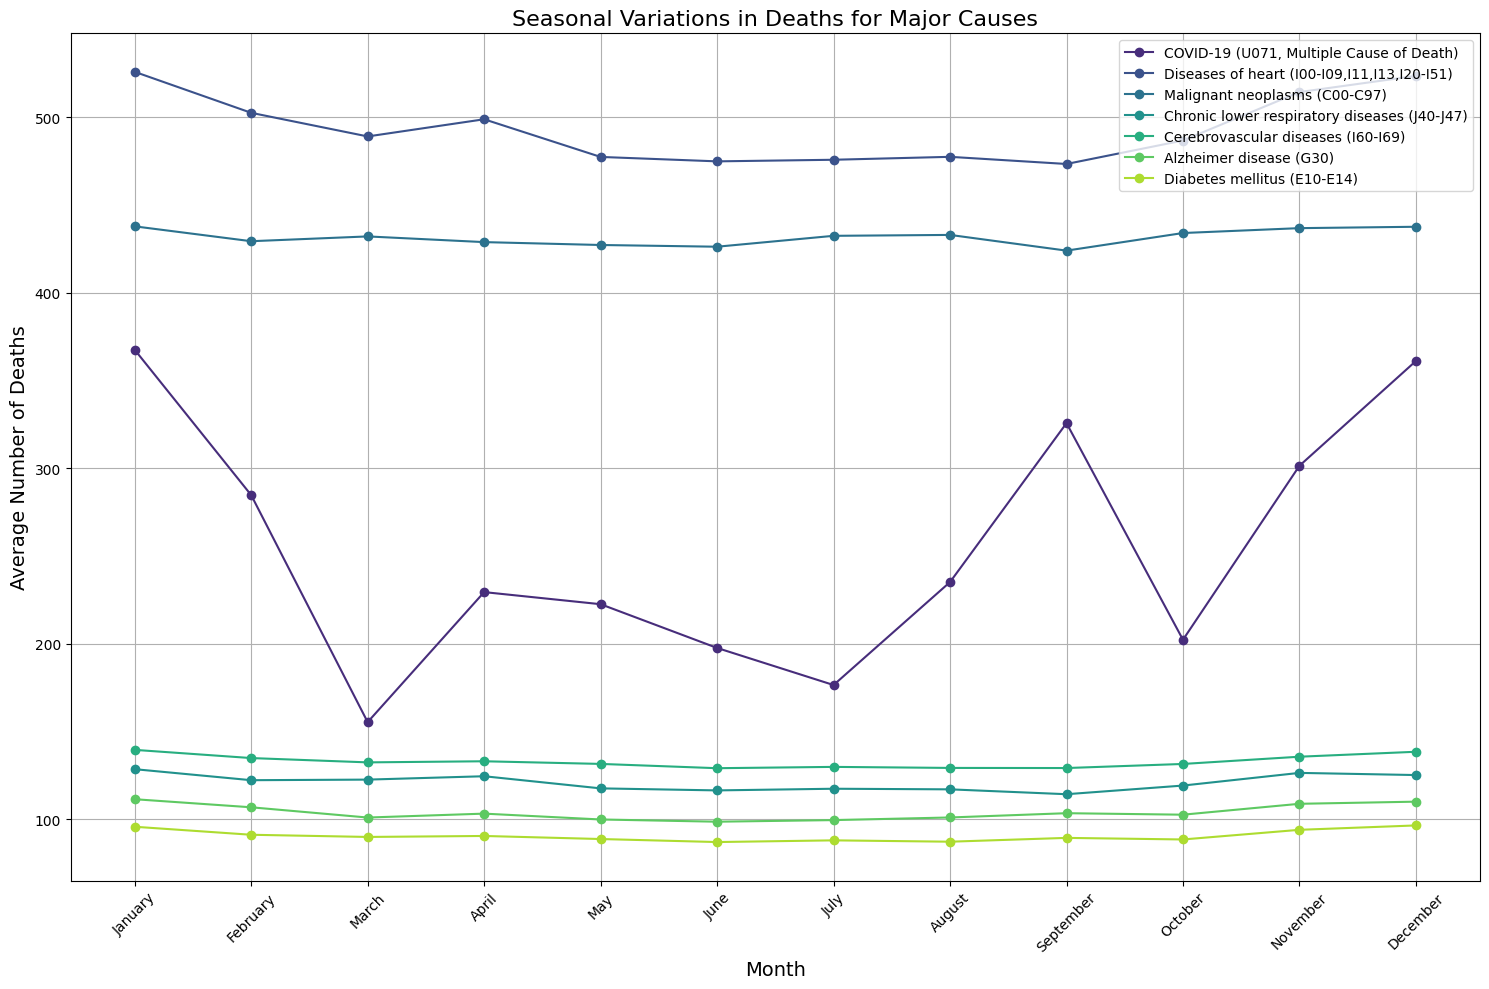

In [ ]:
# We need to aggregate data by month to see seasonal trends
seasonal_data = seasonal_data.groupby('Month').mean()

# We'll focus on the same major causes of death as in previous visualizations for consistency
selected_causes_seasonal = [
    'COVID-19 (U071, Multiple Cause of Death)',
    'Diseases of heart (I00-I09,I11,I13,I20-I51)',
    'Malignant neoplasms (C00-C97)',
    'Chronic lower respiratory diseases (J40-J47)',
    'Cerebrovascular diseases (I60-I69)',
    'Alzheimer disease (G30)',
    'Diabetes mellitus (E10-E14)'
]

# Selecting data for the plot
seasonal_plot_data = seasonal_data[selected_causes_seasonal]

# Create line charts for each cause of death
plt.figure(figsize=(15, 10))
for cause, color in zip(seasonal_plot_data.columns, colors[:len(selected_causes_seasonal)]):
    plt.plot(seasonal_plot_data.index, seasonal_plot_data[cause], label=cause, marker='o', color=color)

# Formatting the chart
plt.title('Seasonal Variations in Deaths for Major Causes', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Number of Deaths', fontsize=14)
plt.xticks(seasonal_plot_data.index, ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], rotation=45)
plt.legend(loc='upper right')
plt.grid(visible=True)
plt.tight_layout()

plt.show()


The visualization presents line charts showing the average number of deaths for major causes by month, seeking to identify any seasonal trends.
Key observations:
Consistent Trends for Chronic Diseases: Diseases such as heart disease, malignant neoplasms, and diabetes mellitus maintain a relatively steady trend throughout the year, suggesting no significant seasonal impact.
Potential Seasonal Influence on Respiratory Diseases: Chronic lower respiratory diseases appear to have a slight increase in deaths during the winter months, which could be attributed to seasonal factors such as cold weather or increased prevalence of respiratory infections during this time.
COVID-19 Variations: The line representing COVID-19 shows fluctuations, suggesting potential seasonal influences or impacts from other factors such as waves of the pandemic, changes in public health measures, or variations in testing rates.
General Stability: Most causes of death do not demonstrate strong seasonal fluctuations, indicating that these mortality rates are relatively stable throughout the year, outside of external influences like pandemics.
This visualization can assist health officials in preparing for potential seasonal impacts on various causes of death and in understanding the general stability of certain health issues throughout the year.

# **Correlation among Causes of Deaths**

## **How are different causes of deaths realted to each other?**

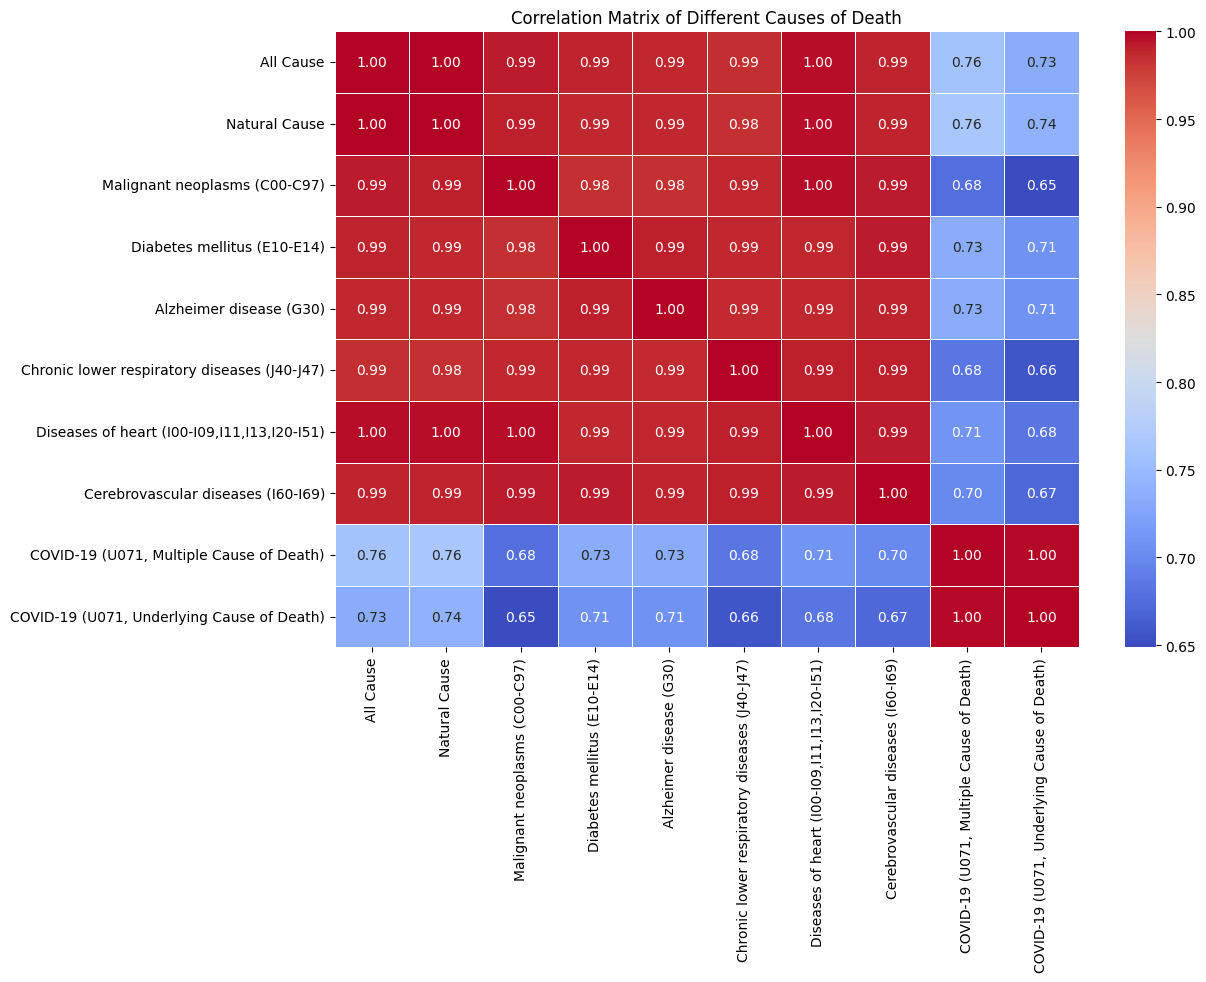

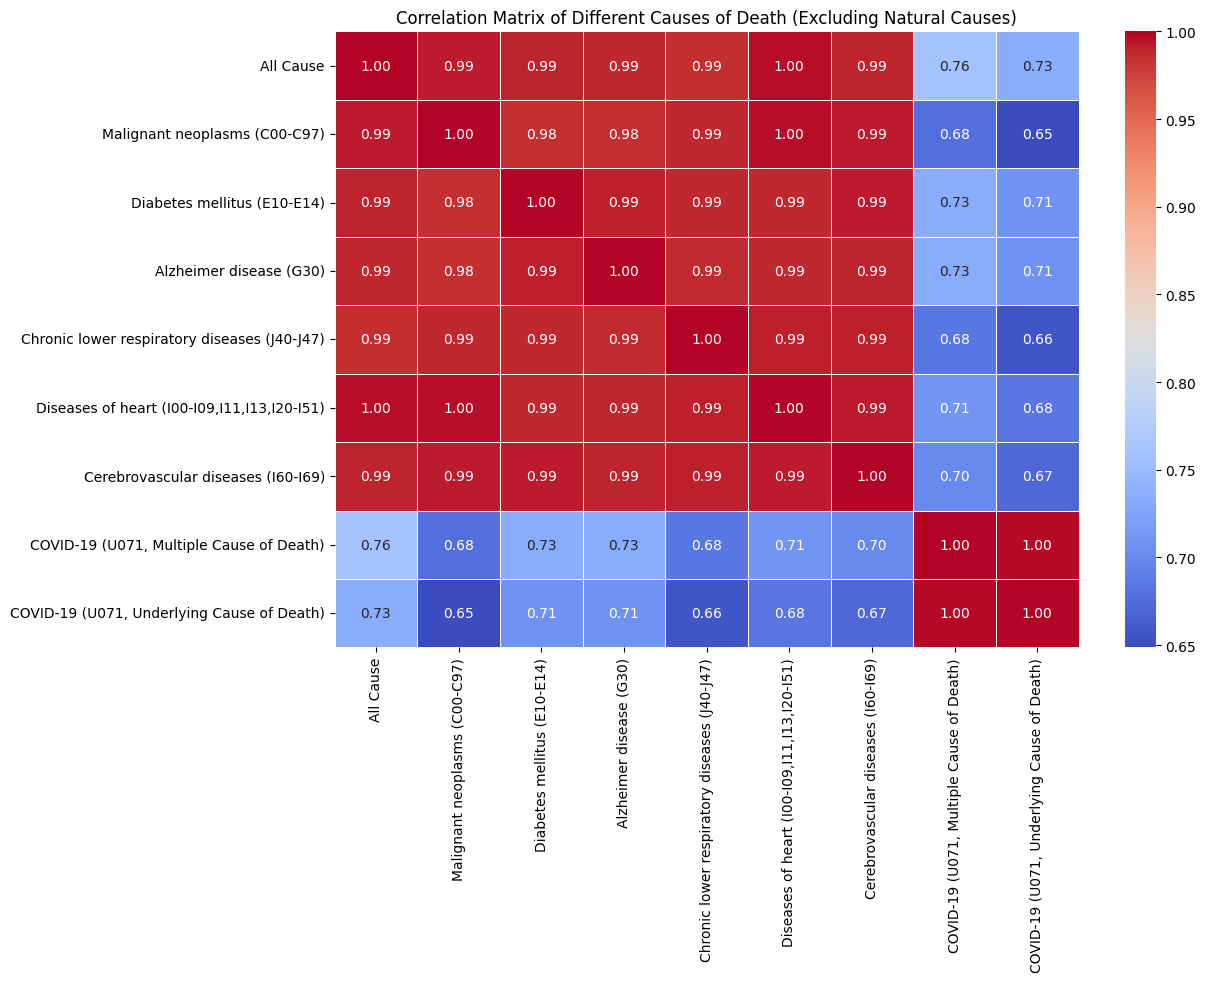

,All Cause,Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),Alzheimer disease (G30),Chronic lower respiratory diseases (J40-J47),"Diseases of heart (I00-I09,I11,I13,I20-I51)",Cerebrovascular diseases (I60-I69),"COVID-19 (U071, Multiple Cause of Death)","COVID-19 (U071, Underlying Cause of Death)"
All Cause,1.000000,0.992301,0.989105,0.988533,0.985580,0.996931,0.989982,0.758873,0.733237
Malignant neoplasms (C00-C97),0.992301,1.000000,0.984863,0.984335,0.988647,0.997184,0.992368,0.676939,0.648720
Diabetes mellitus (E10-E14),0.989105,0.984863,1.000000,0.991232,0.988811,0.988927,0.991931,0.733191,0.706927
Alzheimer disease (G30),0.988533,0.984335,0.991232,1.000000,0.987251,0.987978,0.989400,0.732874,0.707407
Chronic lower respiratory diseases (J40-J47),0.985580,0.988647,0.988811,0.987251,1.000000,0.991073,0.991528,0.683055,0.655615
"Diseases of heart (I00-I09,I11,I13,I20-I51)",0.996931,0.997184,0.988927,0.987978,0.991073,1.000000,0.992964,0.709569,0.681688
Cerebrovascular diseases (I60-I69),0.989982,0.992368,0.991931,0.989400,0.991528,0.992964,1.000000,0.700328,0.671974
"COVID-19 (U071, Multiple Cause of Death)",0.758873,0.676939,0.733191,0.732874,0.683055,0.709569,0.700328,1.000000,0.997429
"COVID-19 (U071, Underlying Cause of Death)",0.733237,0.648720,0.706927,0.707407,0.655615,0.681688,0.671974,0.997429,1.000000


In [ ]:
# Filter out non-numeric columns and date columns
numeric_data = cleaned_data.select_dtypes(include=['float64', 'int64']).drop(columns=['MMWR Year', 'MMWR Week'])

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=.5)
plt.title('Correlation Matrix of Different Causes of Death')
plt.show()

correlation_matrix

# Remove the "Natural Cause" column and recalculate the correlation matrix
numeric_data_without_natural = numeric_data.drop(columns=['Natural Cause'])

# Calculate correlation matrix
correlation_matrix_without_natural = numeric_data_without_natural.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_without_natural, annot=True, fmt=".2f", cmap="coolwarm", linewidths=.5)
plt.title('Correlation Matrix of Different Causes of Death (Excluding Natural Causes)')
plt.show()

correlation_matrix_without_natural


The analysis reveals:
High Correlation Among Several Causes: Most causes of death, excluding COVID-19, still maintain a high correlation with each other, generally above 0.98. This suggests that the counts for these causes tend to rise and fall together.
Moderate Correlation with COVID-19 Deaths: The number of deaths from COVID-19 (both "Multiple Cause of Death" and "Underlying Cause of Death") continues to show a moderate positive correlation with other causes of death, with coefficients ranging from approximately 0.65 to 0.73.
Very High Correlation Between Different Reporting of COVID-19: The "COVID-19 (U071, Multiple Cause of Death)" and "COVID-19 (U071, Underlying Cause of Death)" columns are still highly correlated, with a coefficient of approximately 0.997.
For public health officials, excluding "Natural Causes" doesn't significantly change the insights:
The continued moderate correlation between COVID-19 deaths and other causes of death reinforces the need to consider comprehensive health strategies that address multiple health conditions together, especially during a pandemic.
The strong correlation among other causes of death (like "Diseases of heart" and "Diabetes mellitus") suggests that public health measures and lifestyle interventions that reduce the risk of one major disease could potentially reduce the risk of others.
Understanding these correlations can also help in anticipating healthcare needs and in the allocation of resources, as a rise in one cause of death might suggest a concurrent rise in others.
As before, these are correlations, not causations. Further studies would be required to determine any causal relationships.

## **How do the yearly trends for various causes of death move relative to each other?**

In [ ]:
cause_specific_data = cleaned_data.copy()
# Assuming 'Week Ending Date' is not a datetime column
cause_specific_data['Week Ending Date'] = pd.to_datetime(cause_specific_data['Week Ending Date'])

# Create the 'Month' column
cause_specific_data['Year'] = cause_specific_data['Week Ending Date'].dt.year

In [ ]:
cause_specific_data

,Data As Of,Jurisdiction of Occurrence,MMWR Year,MMWR Week,Month,Week Ending Date,All Cause,Natural Cause,Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),Alzheimer disease (G30),Chronic lower respiratory diseases (J40-J47),"Diseases of heart (I00-I09,I11,I13,I20-I51)",Cerebrovascular diseases (I60-I69),"COVID-19 (U071, Multiple Cause of Death)","COVID-19 (U071, Underlying Cause of Death)",Year
0,09/20/2023,United States,2020,1,Jan,2020-04-01,60170.0,55005.0,11567.0,1829.0,2537.0,3500.0,14202.0,3110.0,0.0,0.0,2020
1,09/20/2023,United States,2020,2,Jan,2020-11-01,60735.0,55754.0,11962.0,1942.0,2566.0,3708.0,13911.0,3189.0,1.0,1.0,2020
2,09/20/2023,United States,2020,3,Jan,2020-01-18,59363.0,54517.0,11702.0,1819.0,2491.0,3526.0,13593.0,3256.0,2.0,1.0,2020
3,09/20/2023,United States,2020,4,Jan,2020-01-25,59162.0,54401.0,11879.0,1864.0,2517.0,3403.0,13612.0,3185.0,3.0,2.0,2020
4,09/20/2023,United States,2020,5,Feb,2020-01-02,58843.0,54006.0,11963.0,1828.0,2480.0,3314.0,13467.0,3084.0,0.0,0.0,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10417,09/20/2023,Puerto Rico,2023,32,Aug,2023-12-08,629.0,605.0,132.0,60.0,57.0,19.0,104.0,17.0,15.0,14.0,2023
10418,09/20/2023,Puerto Rico,2023,33,Aug,2023-08-19,606.0,585.0,91.0,48.0,48.0,15.0,111.0,26.0,15.0,12.0,2023
10419,09/20/2023,Puerto Rico,2023,34,Aug,2023-08-26,642.0,613.0,109.0,47.0,60.0,15.0,118.0,30.0,21.0,18.0,2023
10420,09/20/2023,Puerto Rico,2023,35,Sep,2023-02-09,534.0,516.0,90.0,67.0,57.0,13.0,95.0,20.0,14.0,10.0,2023


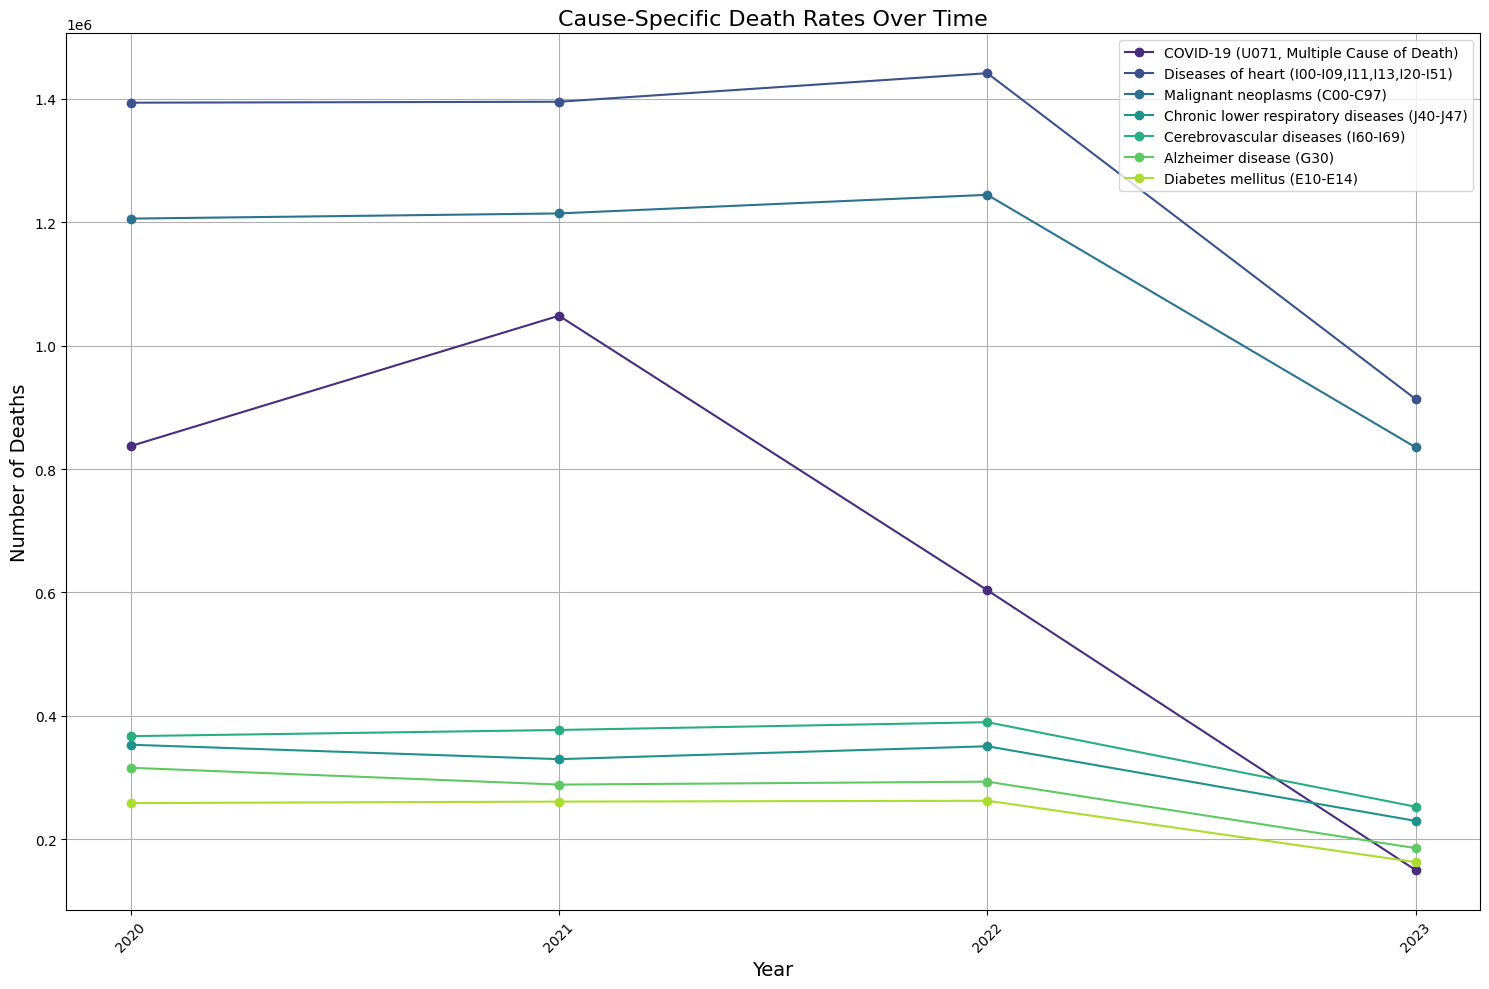

In [ ]:
# Prepare data for cause-specific death rates over time
cause_specific_data = cause_specific_data.groupby('Year').sum()

# We'll focus on the same major causes of death as in previous visualizations for consistency
selected_causes_cause_specific = [
    'COVID-19 (U071, Multiple Cause of Death)',
    'Diseases of heart (I00-I09,I11,I13,I20-I51)',
    'Malignant neoplasms (C00-C97)',
    'Chronic lower respiratory diseases (J40-J47)',
    'Cerebrovascular diseases (I60-I69)',
    'Alzheimer disease (G30)',
    'Diabetes mellitus (E10-E14)'
]

# Selecting data for the plot
cause_specific_plot_data = cause_specific_data[selected_causes_cause_specific]

# Create line charts for each cause of death
plt.figure(figsize=(15, 10))
for cause, color in zip(cause_specific_plot_data.columns, colors[:len(selected_causes_cause_specific)]):
    plt.plot(cause_specific_plot_data.index, cause_specific_plot_data[cause], label=cause, marker='o', color=color)

# Formatting the chart
plt.title('Cause-Specific Death Rates Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Deaths', fontsize=14)
plt.xticks(cause_specific_plot_data.index, rotation=45)
plt.legend(loc='upper right')
plt.grid(visible=True)
plt.tight_layout()

plt.show()


The visualization presents line charts depicting the number of deaths for selected major causes over the years. This longitudinal view allows us to observe any significant changes or trends.
Key observations:
COVID-19 Trends: The line for COVID-19 shows a significant number of deaths in the initial years, reflecting the impact of the pandemic. The trend would need to be monitored in subsequent years to determine if the impact decreases with global health measures and vaccination efforts.
Stable Trends for Chronic Diseases: Chronic conditions such as heart diseases, malignant neoplasms, and diabetes mellitus show a relatively stable trend, indicating consistent impact over the years.
Significant Health Burdens: The diseases represented here are significant contributors to mortality and remain substantial health burdens over time.
Data Interpretation: The data for the year 2023 might not be complete, as the dataset includes information up to a specific point in the current year. This incomplete data could explain why the numbers for 2023 appear lower than for previous years.
This visualization is crucial for health officials and policymakers, as understanding the trends in cause-specific death rates can guide public health priorities, policy development, and resource allocation.

# **Mortality Trends by Jurisdiction**

## **How does the mortality vary across jurisdictions?**

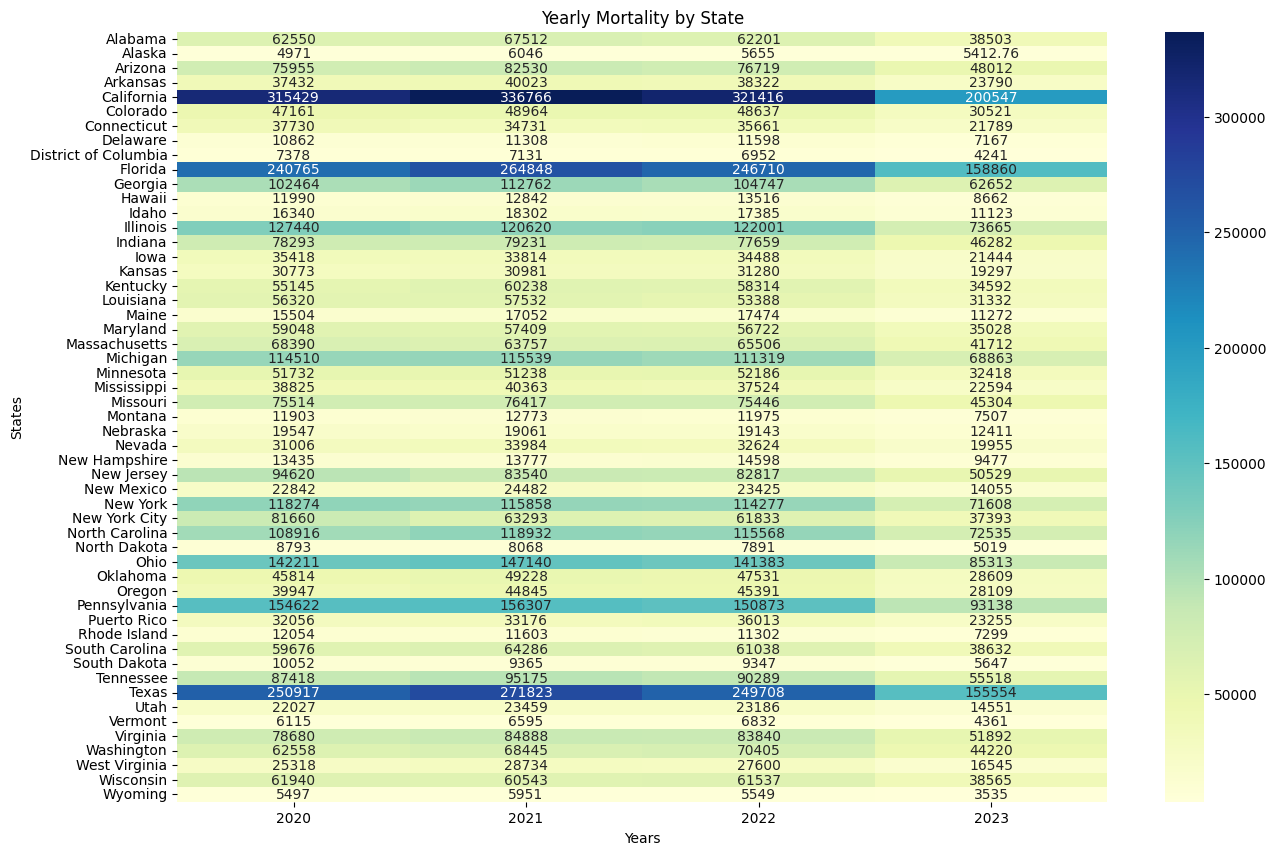

In [ ]:
cleaned_data_withoutUS = cleaned_data[cleaned_data["Jurisdiction of Occurrence"] != "United States"]
cleaned_data_withoutUS['Week Ending Date'] = pd.to_datetime(cleaned_data_withoutUS['Week Ending Date'])
cleaned_data_withoutUS['MMWR Year'] = cleaned_data_withoutUS['Week Ending Date'].dt.year
heatmap_data = cleaned_data_withoutUS.groupby(['Jurisdiction of Occurrence', 'MMWR Year'])['All Cause'].sum().unstack()
plt.figure(figsize=(15, 10))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='g')
plt.title('Yearly Mortality by State')
plt.xlabel('Years')
plt.ylabel('States')
plt.show()


The visualization presents a heat map which depicts the yearly mortality across all states of the US.

Key insights:

COVID-19 Trends: For the vast majority of the states we do notice that the  number of deaths has decreased from 2021 to 2022, pointing to the fact that we were slowly coming out f the pandemic and that people were vaccinated.

Another key insight is the in terms of overall deaths the stated that show notable variations are Florida, California and Texas.

## **How do the mortality rates vary amongst the top 5 states over the years?**

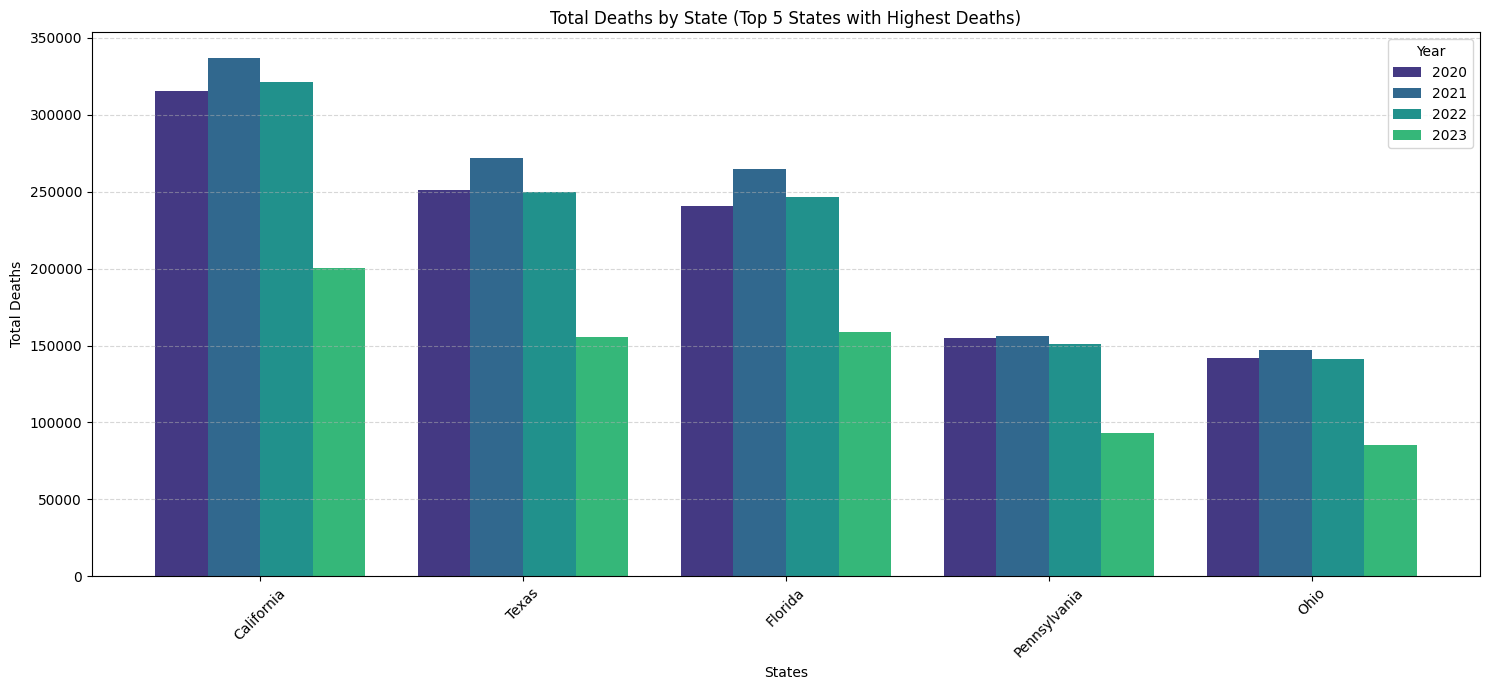

In [ ]:
# Define top_states based on total deaths across the years
top_states = cleaned_data_withoutUS.groupby('Jurisdiction of Occurrence')['All Cause'].sum().nlargest(5).index.tolist()

# Create a color palette for the bars
colors = sns.color_palette('viridis', len(top_states))

# Initialize lists to store the total deaths for each state and year
total_deaths_by_state_2020 = []
total_deaths_by_state_2021 = []
total_deaths_by_state_2022 = []
total_deaths_by_state_2023 = []

# Iterate through the states and calculate total deaths for each year and append it in the total_deaths_by_state_20XX list
for state in top_states:
    state_data_2020 = cleaned_data_withoutUS[(cleaned_data_withoutUS['MMWR Year'] == 2020) & (cleaned_data_withoutUS['Jurisdiction of Occurrence'] == state)]
    state_data_2021 = cleaned_data_withoutUS[(cleaned_data_withoutUS['MMWR Year'] == 2021) & (cleaned_data_withoutUS['Jurisdiction of Occurrence'] == state)]
    state_data_2022 = cleaned_data_withoutUS[(cleaned_data_withoutUS['MMWR Year'] == 2022) & (cleaned_data_withoutUS['Jurisdiction of Occurrence'] == state)]
    state_data_2023 = cleaned_data_withoutUS[(cleaned_data_withoutUS['MMWR Year'] == 2023) & (cleaned_data_withoutUS['Jurisdiction of Occurrence'] == state)]

    total_deaths_2020 = state_data_2020['All Cause'].sum()
    total_deaths_2021 = state_data_2021['All Cause'].sum()
    total_deaths_2022 = state_data_2022['All Cause'].sum()
    total_deaths_2023 = state_data_2023['All Cause'].sum()

    total_deaths_by_state_2020.append(total_deaths_2020)
    total_deaths_by_state_2021.append(total_deaths_2021)
    total_deaths_by_state_2022.append(total_deaths_2022)
    total_deaths_by_state_2023.append(total_deaths_2023)

# Create a new figure
plt.figure(figsize=(15, 7))

# Calculate the positions for the bars
bar_width = 0.2
index = np.arange(len(top_states))

# Create bars for each year
plt.bar(index - 1.5*bar_width, total_deaths_by_state_2020, bar_width, label='2020', color=colors[0])
plt.bar(index - 0.5*bar_width, total_deaths_by_state_2021, bar_width, label='2021', color=colors[1])
plt.bar(index + 0.5*bar_width, total_deaths_by_state_2022, bar_width, label='2022', color=colors[2])
plt.bar(index + 1.5*bar_width, total_deaths_by_state_2023, bar_width, label='2023', color=colors[3])

# Set x-axis labels
plt.xticks(index, top_states, rotation=45)
plt.title('Total Deaths by State (Top 5 States with Highest Deaths)')
plt.xlabel('States')
plt.ylabel('Total Deaths')
plt.legend(title='Year', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

The visualization presents a comparison between the states with the highest deaths, the states being California, Texas, Florida, Pennsylvania and Ohio across 2020-2023.

Key insights:

COVID-19 Trends: Across all the 5 states we can see that the number of deaths decrease between 2021 and 2022.

During the period from 2020 to 2023, California consistently recorded the highest mortality rates, with Texas, Florida, Pennsylvania, and Ohio also experiencing very high numbers of deaths. Evidently, the year 2020 and 2021 stood out as a particularly exceptional period across these states, witnessing a significant surge in mortality. The primary contributing factor to this spike can be attributed to the global COVID-19 pandemic which caused most deaths worldwide including the US.

## **What are the total and relative number of deaths from all causes by jurisdiction?**

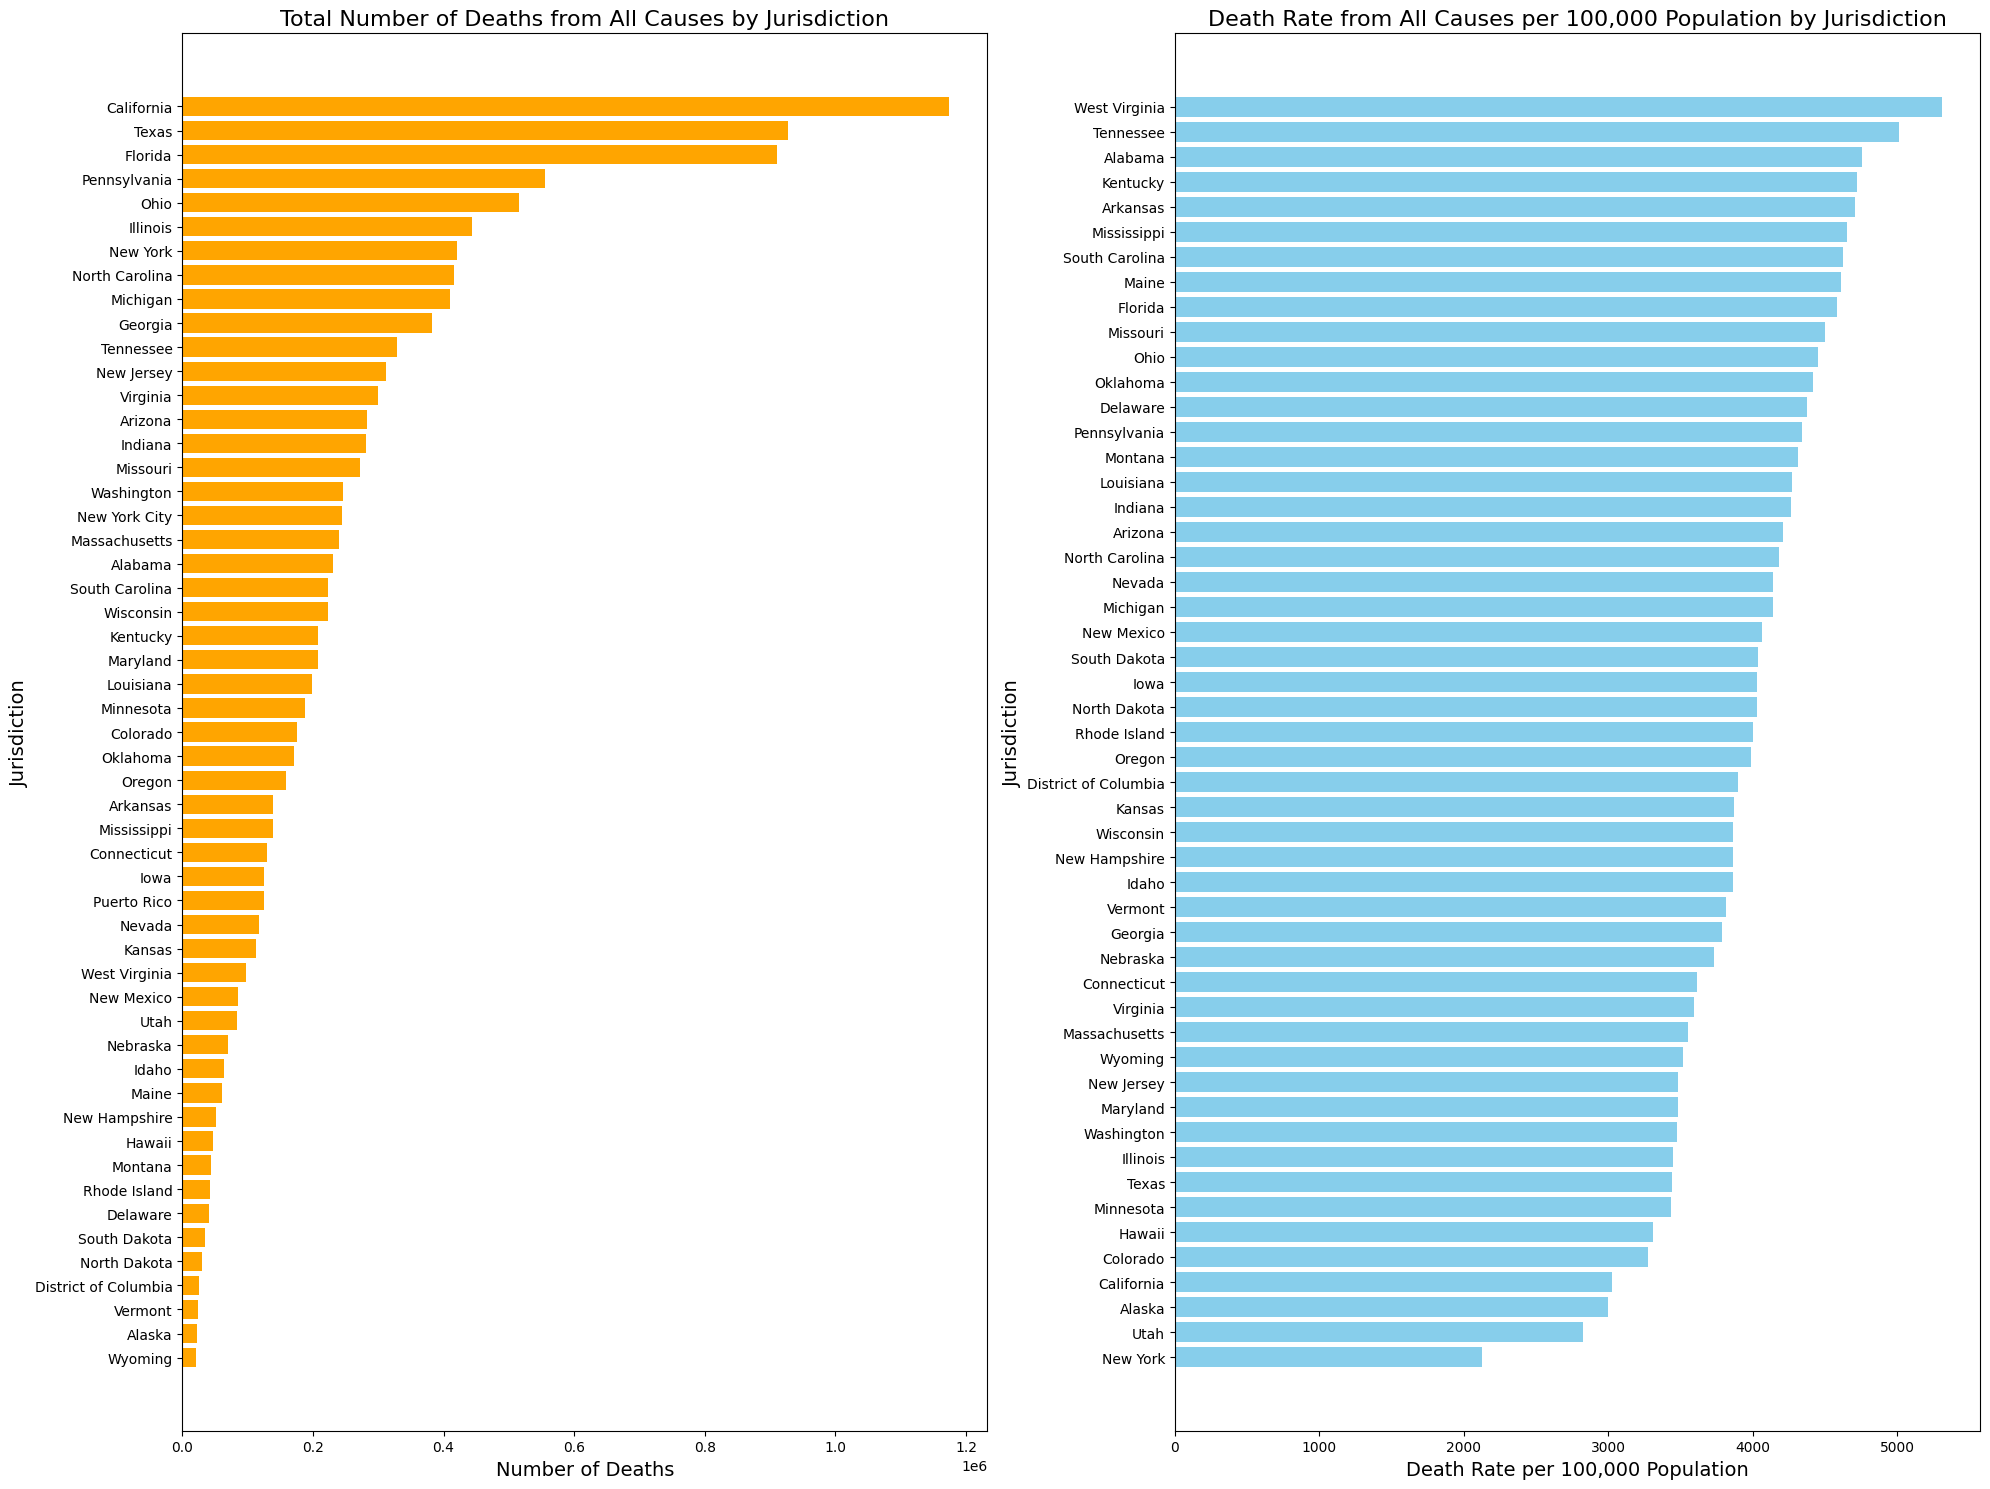

In [ ]:
# Aggregate death data by jurisdiction
jurisdiction_deaths = cleaned_data[cleaned_data['Jurisdiction of Occurrence'] != 'United States']  # exclude aggregated data for the entire US
jurisdiction_deaths = jurisdiction_deaths.groupby('Jurisdiction of Occurrence').sum()
jurisdiction_deaths = jurisdiction_deaths[['All Cause']]  # focusing on all causes of death

# Sort jurisdictions by number of deaths
sorted_jurisdictions = jurisdiction_deaths.sort_values('All Cause', ascending=False)

# Creating a dictionary from the provided population data
population_data = {
    'Alabama': 4849377, 'Alaska': 736732, 'Arizona': 6731484, 'Arkansas': 2966369, 'California': 38802500, 'Colorado': 5355866,
    'Connecticut': 3596677, 'Delaware': 935614, 'District of Columbia': 658893, 'Florida': 19893297, 'Georgia': 10097343,
    'Hawaii': 1419561, 'Idaho': 1634464, 'Illinois': 12880580, 'Indiana': 6596855, 'Iowa': 3107126, 'Kansas': 2904021,
    'Kentucky': 4413457, 'Louisiana': 4649676, 'Maine': 1330089, 'Maryland': 5976407, 'Massachusetts': 6745408,
    'Michigan': 9909877, 'Minnesota': 5457173, 'Mississippi': 2994079, 'Missouri': 6063589, 'Montana': 1023579,
    'Nebraska': 1881503, 'Nevada': 2839099, 'New Hampshire': 1326813, 'New Jersey': 8938175, 'New Mexico': 2085572,
    'New York': 19746227, 'North Carolina': 9943964, 'North Dakota': 739482, 'Ohio': 11594163, 'Oklahoma': 3878051,
    'Oregon': 3970239, 'Pennsylvania': 12787209, 'Rhode Island': 1055173, 'South Carolina': 4832482, 'South Dakota': 853175,
    'Tennessee': 6549352, 'Texas': 26956958, 'Utah': 2942902, 'Vermont': 626562, 'Virginia': 8326289, 'Washington': 7061530,
    'West Virginia': 1850326, 'Wisconsin': 5757564, 'Wyoming': 584153
}

# Convert the population data to a DataFrame
population_df = pd.DataFrame(list(population_data.items()), columns=['Jurisdiction of Occurrence', 'Population'])

# Merge the population data with the death data
death_rates = jurisdiction_deaths.reset_index().merge(population_df, on='Jurisdiction of Occurrence')

# Calculate the death rate per 100,000 population
death_rates['Death Rate'] = death_rates['All Cause'] / death_rates['Population'] * 100000

death_rates = death_rates.sort_values(by='Death Rate', ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 15))

# Plot the first bar chart (total number of deaths)
axes[0].barh(sorted_jurisdictions.index, sorted_jurisdictions['All Cause'], color='orange')
axes[0].set_xlabel('Number of Deaths', fontsize=14)
axes[0].set_ylabel('Jurisdiction', fontsize=14)
axes[0].set_title('Total Number of Deaths from All Causes by Jurisdiction', fontsize=16)
axes[0].invert_yaxis()  # to have the jurisdiction with the highest number of deaths at the top

# Plot the second bar chart (death rates per 100,000 population)
axes[1].barh(death_rates['Jurisdiction of Occurrence'], death_rates['Death Rate'], color='skyblue')
axes[1].set_xlabel('Death Rate per 100,000 Population', fontsize=14)
axes[1].set_ylabel('Jurisdiction', fontsize=14)
axes[1].set_title('Death Rate from All Causes per 100,000 Population by Jurisdiction', fontsize=16)
axes[1].invert_yaxis()  # to have the jurisdiction with the highest death rate at the top

# Adjust layout
plt.tight_layout()

# Show the combined plot
plt.show()

The visualization presents a horizontal bar chart showing the death number and the death rate from all causes per 100,000 population for each jurisdiction, ranked from highest to lowest.
Key observations:
Variability in Death Rates: The death rates vary significantly across jurisdictions. This disparity could be influenced by a range of factors, including healthcare access and quality, prevalence of chronic diseases, demographic differences, and public health policies.
High-Mortality Jurisdictions: Certain jurisdictions stand out for having particularly high death rates per 100,000 population. These areas may require targeted public health interventions and further investigation to understand the underlying causes.
Comparison on a Uniform Scale: Unlike the previous chart with absolute numbers, this chart provides a more accurate comparison by normalizing the death numbers with the population. It gives a clearer picture of the mortality rate relative to the size of each jurisdiction's population.
This visualization is crucial for policymakers and health officials, as it highlights areas with disproportionate mortality rates, guiding resource allocation and public health planning.

Variability in Death Rates: The death rates vary significantly across jurisdictions. This disparity could be influenced by a range of factors, including healthcare access and quality, prevalence of chronic diseases, demographic differences, and public health policies.
High-Mortality Jurisdictions: Certain jurisdictions stand out for having particularly high death rates per 100,000 population. These areas may require targeted public health interventions and further investigation to understand the underlying causes.
Comparison on a Uniform Scale: Unlike the previous chart with absolute numbers, this chart provides a more accurate comparison by normalizing the death numbers with the population. It gives a clearer picture of the mortality rate relative to the size of each jurisdiction's population.
This visualization is crucial for policymakers and health officials, as it highlights areas with disproportionate mortality rates, guiding resource allocation and public health planning.

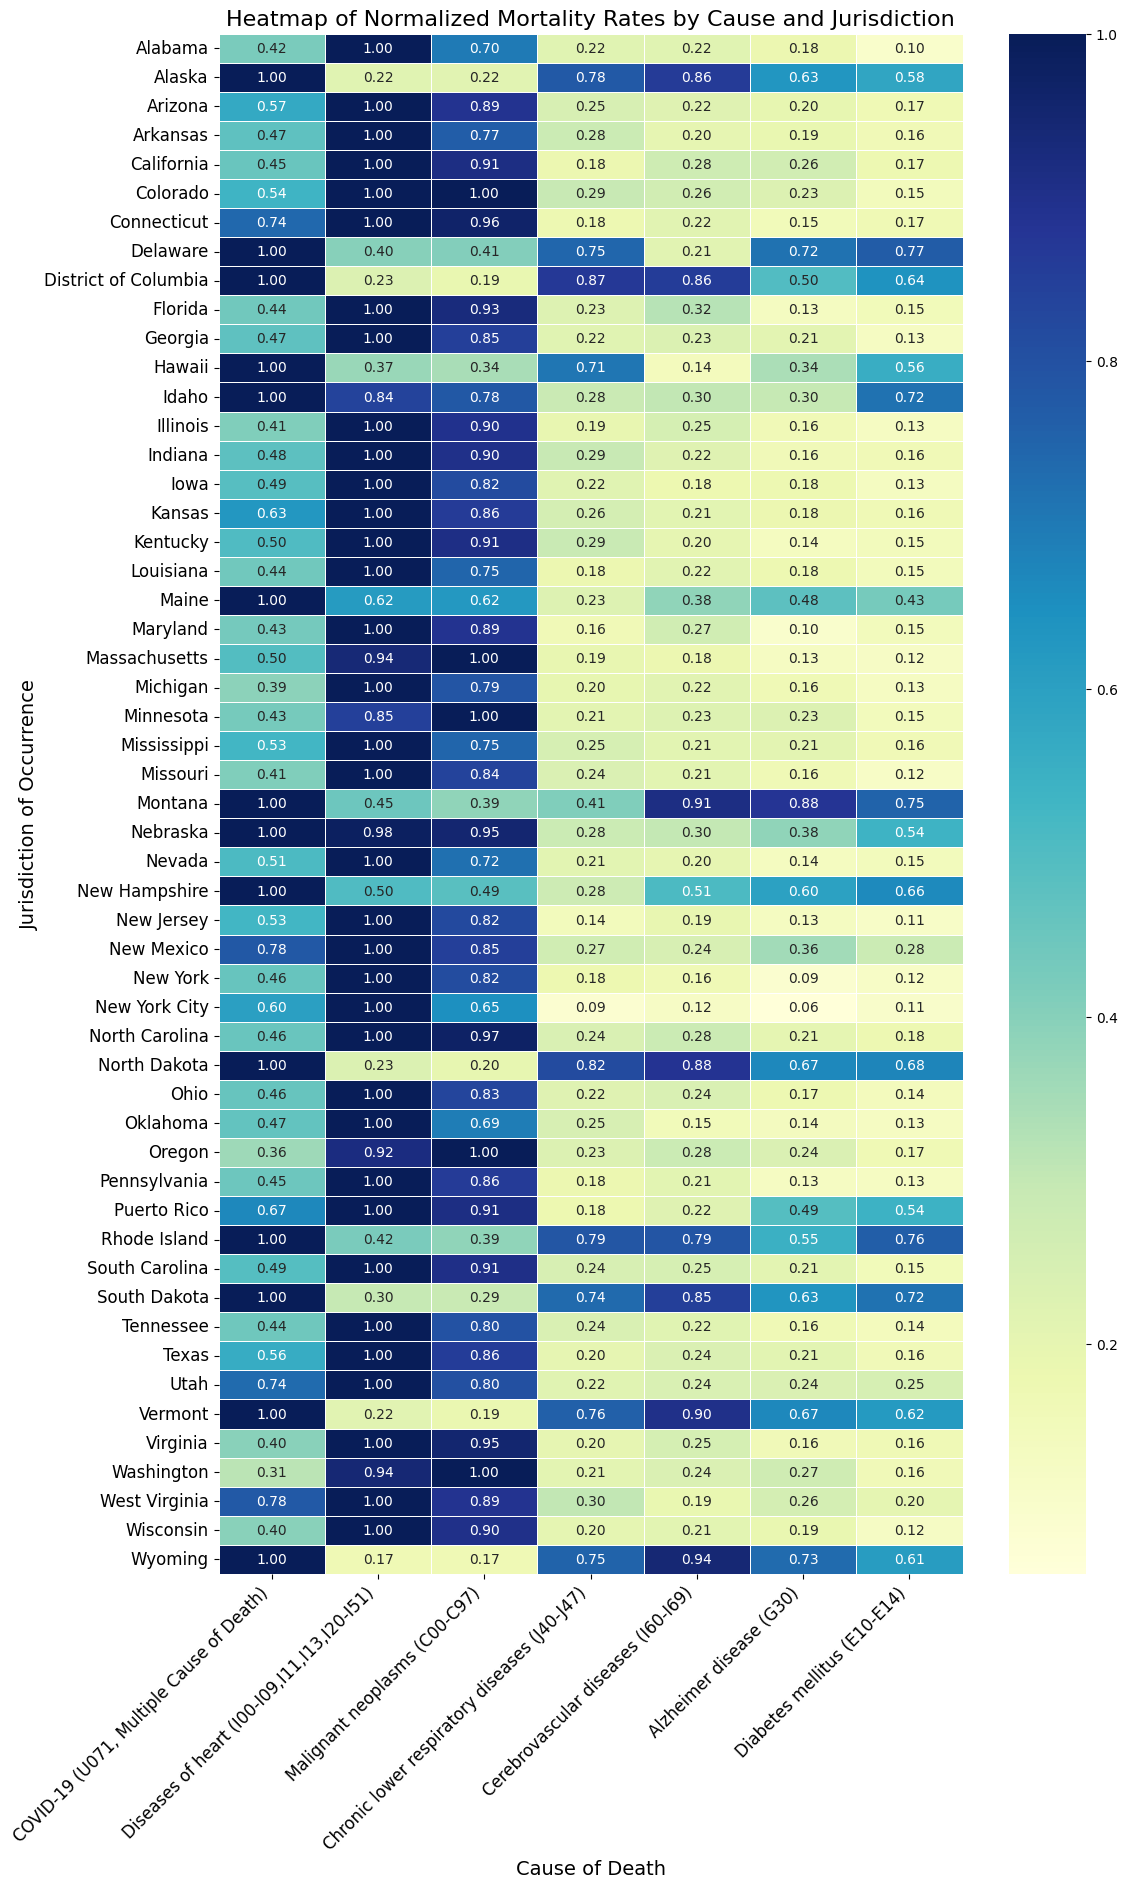

In [ ]:
# Data preparation for the heatmap
heatmap_data = cleaned_data.copy()
heatmap_data = heatmap_data[heatmap_data['Jurisdiction of Occurrence'] != 'United States']  # exclude aggregated data for the entire US

# We will focus on the total deaths for each major cause by jurisdiction
causes_for_heatmap = [
    'COVID-19 (U071, Multiple Cause of Death)',
    'Diseases of heart (I00-I09,I11,I13,I20-I51)',
    'Malignant neoplasms (C00-C97)',
    'Chronic lower respiratory diseases (J40-J47)',
    'Cerebrovascular diseases (I60-I69)',
    'Alzheimer disease (G30)',
    'Diabetes mellitus (E10-E14)'
]

# Aggregating data by jurisdiction
heatmap_prep = heatmap_data.groupby('Jurisdiction of Occurrence')[causes_for_heatmap].sum()

# Normalizing data by the maximum value for better visualization
heatmap_prep_normalized = heatmap_prep.div(heatmap_prep.max(axis=1), axis=0)

# Create a heatmap
plt.figure(figsize=(12, 20))
sns.heatmap(heatmap_prep_normalized, cmap='YlGnBu', annot=True, fmt=".2f", linewidths=.5)

# Formatting the chart
plt.title('Heatmap of Normalized Mortality Rates by Cause and Jurisdiction', fontsize=16)
plt.xlabel('Cause of Death', fontsize=14)
plt.ylabel('Jurisdiction of Occurrence', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

plt.show()


## **How can we geo-visualize the mortality trends across the dates, jurisdictions, and causes?**

In [ ]:
# Load the shape file using geopandas
geo_usa = gpd.read_file("/content/drive/MyDrive/BA780_TeamProject/cb_2022_us_state_20m/cb_2022_us_state_20m.dbf")
geo_usa.rename(columns={"NAME": "Jurisdiction of Occurrence"}, inplace=True)

# Merge renamed_data data and geo_usa shapefile
geo_merge = geo_usa.merge(cleaned_data, on='Jurisdiction of Occurrence')

# Convert the week_end_date column to strings with a specific date format
geo_merge['Week Ending Date'] = pd.to_datetime(geo_merge['Week Ending Date'])
geo_merge = geo_merge.sort_values(by='Week Ending Date')

# To create an interactive choropleth map, we use Dash and Plotly to make it.
# Initialization of Dash App
app = Dash(__name__)

# Dropdown menu options, all the diseases
dropdown_options = [
    {'label': 'All Cause', 'value': 'All Cause'},
    {'label': 'Natural Cause', 'value': 'Natural Cause'},
    {'label': 'Malignant neoplasms (C00-C97)', 'value': 'Malignant neoplasms (C00-C97)'},
    {'label': 'Diabetes', 'value': 'Diabetes mellitus (E10-E14)'},
    {'label': 'Alzheimer disease (G30)', 'value': 'Alzheimer disease (G30)'},
    {'label': 'Chronic lower respiratory diseases (J40-J47)', 'value': 'Chronic lower respiratory diseases (J40-J47)'},
    {'label': 'Diseases of heart (I00-I09,I11,I13,I20-I51)', 'value': 'Diseases of heart (I00-I09,I11,I13,I20-I51)'},
    {'label': 'Cerebrovascular diseases (I60-I69)', 'value': 'Cerebrovascular diseases (I60-I69)'},
    {'label': 'COVID-19 (U071, Multiple Cause of Death)', 'value': 'COVID-19 (U071, Multiple Cause of Death)'},
    {'label': 'COVID-19 (U071, Underlying Cause of Death)', 'value': 'COVID-19 (U071, Underlying Cause of Death)'}]

# App layout
app.layout = html.Div([
    dcc.Dropdown(
        id = 'variable-dropdown',
        options = dropdown_options,
        value = 'All Cause',
        style = {'width': '350px', 'height': '40px'}
    ),
    dcc.Graph(id = 'choropleth-map')
])

# Callback function to updates the choropleth map based on the selected variable from the dropdown menu
@app.callback(
    Output('choropleth-map', 'figure'),
    [Input('variable-dropdown', 'value')]
)

# Create the choropleth map
def update_choropleth(selected_variable):
    # Make the title on the graph to be as same as the label
    selected_label = None
    for item in dropdown_options:
       if item['value'] == selected_variable:
            selected_label = item['label']
            break
    # Choropleth map
    fig = px.choropleth(
        geo_merge,
        locations = 'STUSPS',
        locationmode = 'USA-states',
        color = selected_variable,
        hover_name = 'Jurisdiction of Occurrence',
        hover_data = ["Month"],
        animation_frame=geo_merge['Week Ending Date'].dt.strftime('%Y-%m-%d'),
        scope = 'usa',
        title = f'{selected_label.title()} Trends',
        labels = {"STUSPS": "States", selected_variable: "Mortality Number"},
        custom_data = ["Jurisdiction of Occurrence", "All Cause", "Month"]
    )

    # Update layout and return figure
    fig.update_traces(hovertemplate ='States: %{customdata[0]}<br>Mortality Number: %{customdata[1]}<br>Month: %{customdata[2]}')
    fig.update_xaxes(type='category')
    fig.update_layout(width = 1200, height = 600)
    return fig

# Application execution
if __name__ == '__main__':
    app.run_server(debug = True)

<IPython.core.display.Javascript object>

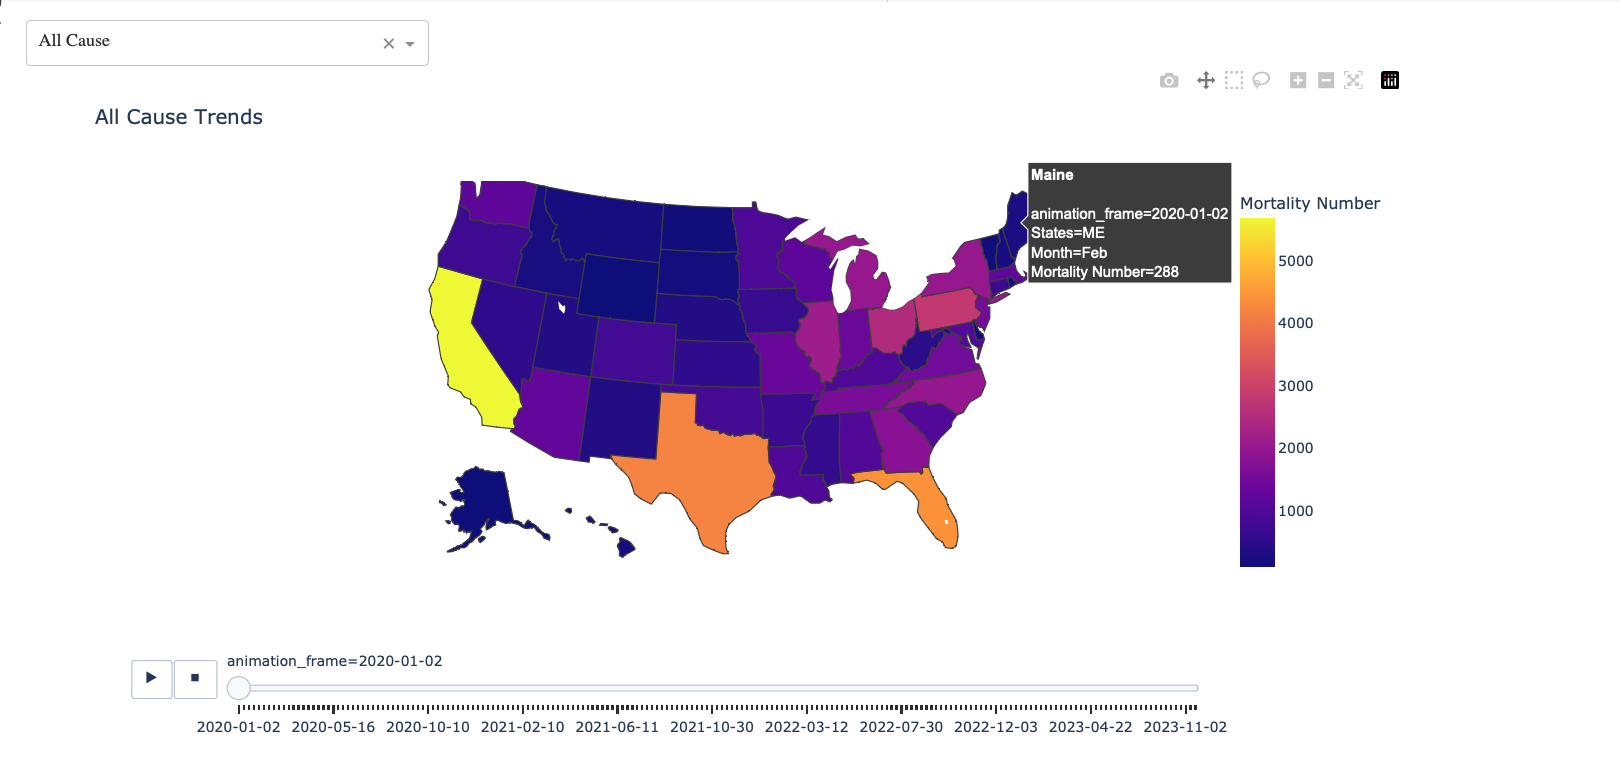

The above image is an interactive geomap. We have utilized an interactive web application, and it will only be visible after it has been executed. Therefore, we have provided a screenshot to help everyone understand this map. We will also demonstrate it during the presentation.

This map illustrates the variations in different diseases across states in the United States over time. Users can select the specific cause of death they are interested in from the dropdown menu. They can then explore changes in the number of deaths by playing the timeline or dragging the timeline slider. Moreover, hovering the mouse over each state provides detailed information about the death toll in that particular state.

On a side note, due to limitations in Colab, this map can only be displayed on Safari; running it on Chrome will result in errors.

# **Analysis of COVID-19 Trends Over Time and Across Jurisdictions**

## **What is the relative death rate from COVID-19 across all jurisdictions?**

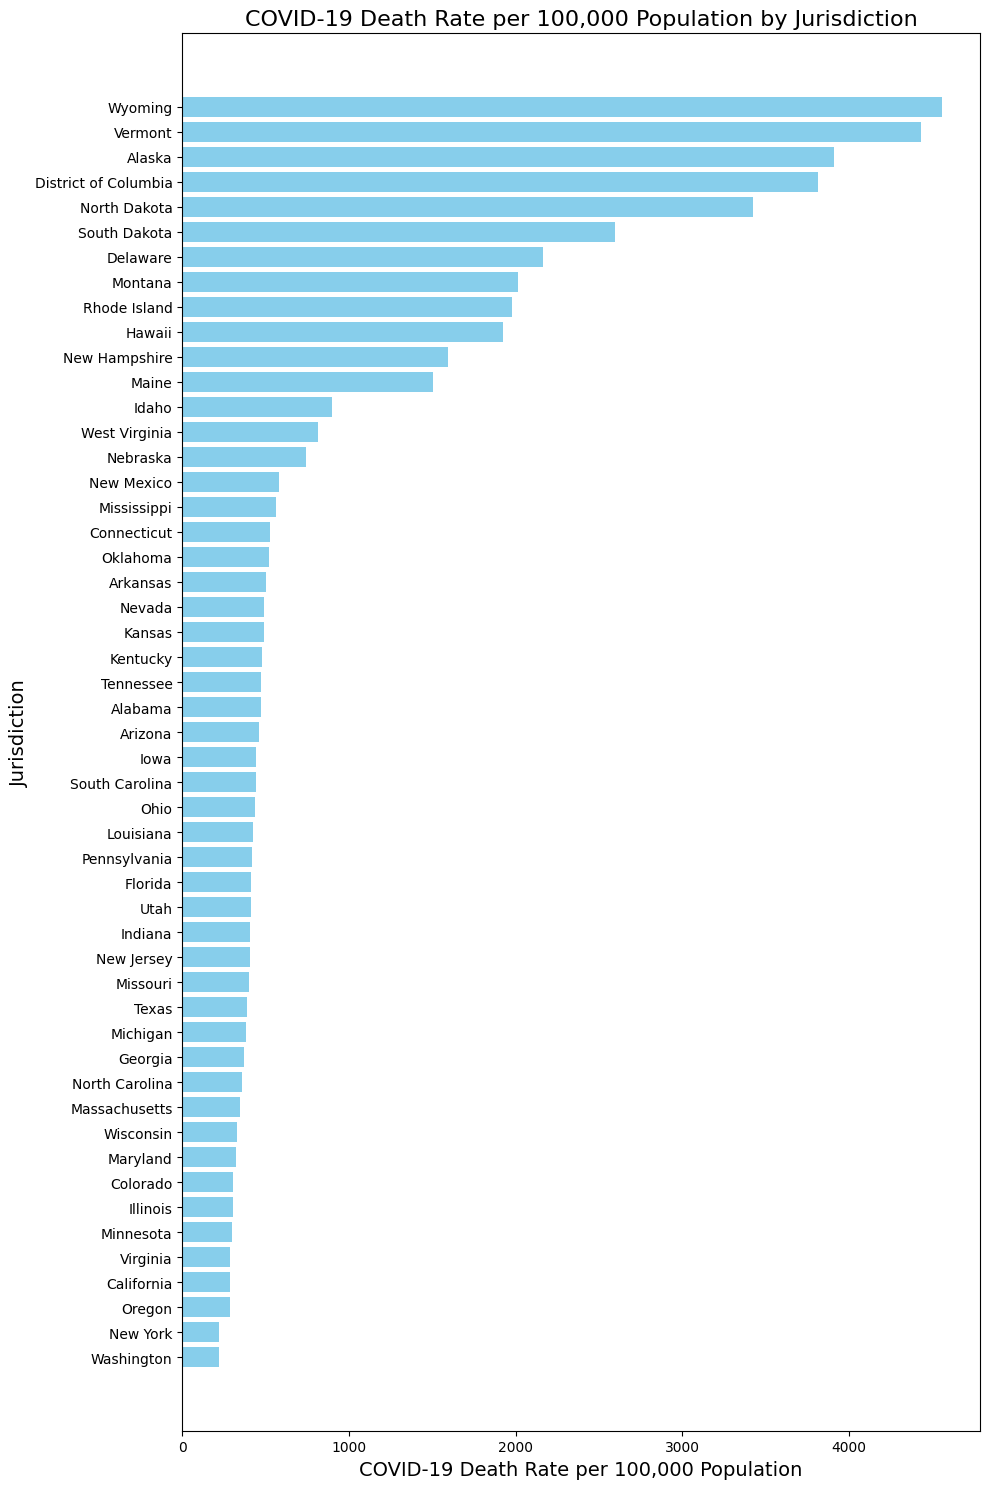

In [ ]:
# Re-calculate the COVID-19 death rate per 100,000 population
# First, we need to ensure that the COVID-19 data is present in our dataframe.
# If it's not, we need to merge it again from the original cleaned data.

# Checking if 'COVID-19 (U071, Multiple Cause of Death)' column exists in death_rates dataframe
if 'COVID-19 (U071, Multiple Cause of Death)' not in death_rates.columns:
    # If not, we need to merge it from the cleaned_data
    covid_deaths = cleaned_data[cleaned_data['Jurisdiction of Occurrence'] != 'United States']  # exclude aggregated data for the entire US
    covid_deaths = covid_deaths.groupby('Jurisdiction of Occurrence').sum()
    covid_deaths = covid_deaths[['COVID-19 (U071, Multiple Cause of Death)']]  # focusing on COVID-19 deaths

    # Merge the COVID-19 death data with the death_rates dataframe
    death_rates = death_rates.merge(covid_deaths, on='Jurisdiction of Occurrence')

# Now we calculate the COVID-19 death rate
death_rates['COVID-19 Death Rate'] = death_rates['COVID-19 (U071, Multiple Cause of Death)'] / death_rates['Population'] * 100000

death_rates = death_rates.sort_values(by='COVID-19 Death Rate', ascending=False)

# Create the bar chart for COVID-19 death rates per 100,000 population
plt.figure(figsize=(10, 15))
plt.barh(death_rates['Jurisdiction of Occurrence'], death_rates['COVID-19 Death Rate'], color='skyblue')
plt.xlabel('COVID-19 Death Rate per 100,000 Population', fontsize=14)
plt.ylabel('Jurisdiction', fontsize=14)
plt.title('COVID-19 Death Rate per 100,000 Population by Jurisdiction', fontsize=16)
plt.gca().invert_yaxis()  # to have the jurisdiction with the highest death rate at the top
plt.tight_layout()

plt.show()


the visualization presents a horizontal bar chart showing the COVID-19 death rate per 100,000 population for each jurisdiction, ranked from highest to lowest.
Key observations:
Variability in COVID-19 Death Rates: Similar to the all-cause death rates, the COVID-19 death rates vary significantly across jurisdictions. This disparity could be influenced by multiple factors, including the prevalence of comorbidities, healthcare system capacity, public health response efficacy, and demographic variables among the population.
High-Mortality Jurisdictions for COVID-19: Certain jurisdictions have particularly high COVID-19 death rates per 100,000 population. These areas might have faced more severe outbreaks, healthcare system challenges, or other factors that contributed to higher mortality.
Importance of Per Capita Metrics: This chart, like the previous one for all-cause mortality, underscores the importance of examining death rates on a per capita basis to account for population size differences when comparing jurisdictions.
This visualization provides crucial insights for health officials and policymakers, helping them understand the regional impacts of the COVID-19 pandemic and potentially guiding response strategies and resource allocation.

## **What density of total mortality across the years is caused by COVID-19?**

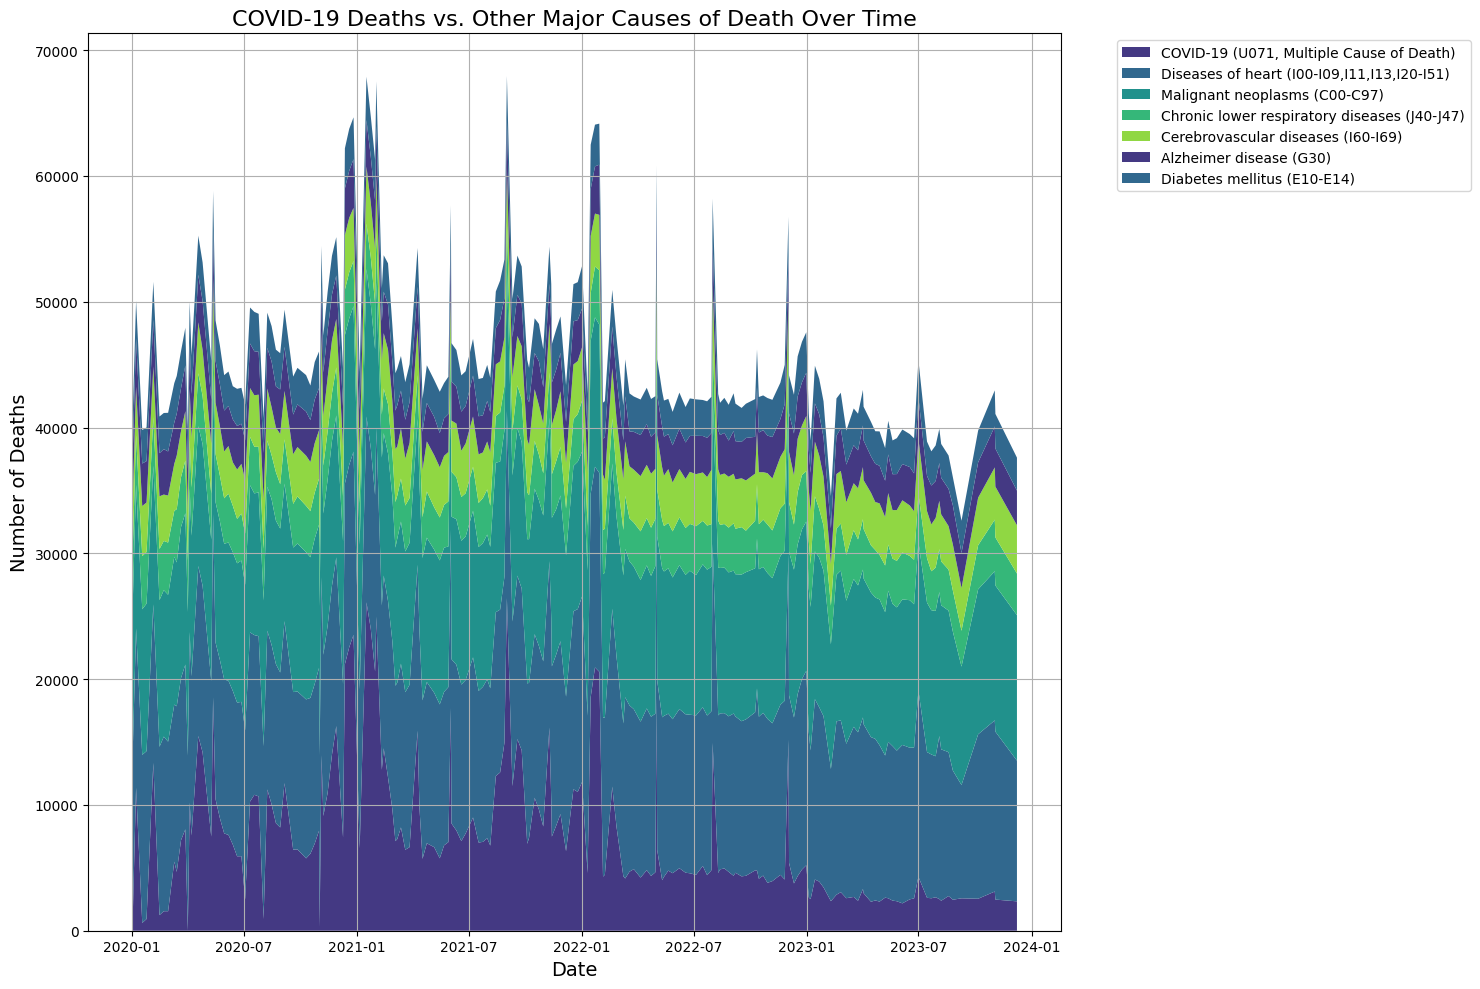

In [ ]:
# Correcting the column names
selected_causes_corrected = [
    'COVID-19 (U071, Multiple Cause of Death)',
    'Diseases of heart (I00-I09,I11,I13,I20-I51)',
    'Malignant neoplasms (C00-C97)',
    'Chronic lower respiratory diseases (J40-J47)',
    'Cerebrovascular diseases (I60-I69)',
    'Alzheimer disease (G30)',
    'Diabetes mellitus (E10-E14)'
]


cleaned_data['Week Ending Date'] = pd.to_datetime(cleaned_data['Week Ending Date'])

# Filter out the "United States" aggregated data and the "All Cause" and "Natural Cause" columns
filtered_data = cleaned_data[(cleaned_data['Jurisdiction of Occurrence'] != 'United States') &
                             (cleaned_data['Jurisdiction of Occurrence'] != 'New York City')]  # NYC is separately reported
causes_data = filtered_data.drop(columns=['All Cause', 'Natural Cause', 'Jurisdiction of Occurrence',
                                          'MMWR Year', 'MMWR Week', 'Data As Of'])

# Aggregate data by date
date_data = causes_data.groupby('Week Ending Date').sum()

# Selecting data for the plot
plot_data_corrected = date_data[selected_causes_corrected]

# Create a stacked area chart
plt.figure(figsize=(15, 10))
plt.stackplot(plot_data_corrected.index, [plot_data_corrected[cause] for cause in plot_data_corrected.columns], labels=plot_data_corrected.columns, colors=colors[:len(selected_causes_corrected)])

# Formatting the chart
plt.title('COVID-19 Deaths vs. Other Major Causes of Death Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Deaths', fontsize=14)
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.grid(visible=True)
plt.tight_layout()

plt.show()


The visualization now presents a stacked area chart comparing COVID-19 deaths to other major causes of death over time. Each colored area represents a different cause of death, and their cumulative height at any point on the x-axis (time) represents the total count of deaths from all these causes combined at that time.
Key observations from the chart:
COVID-19 (Multiple Cause of Death): This category shows significant peaks, particularly around January 2021 and other smaller peaks thereafter, representing the waves of the COVID-19 pandemic.
Diseases of heart and Malignant neoplasms: These areas are quite substantial, indicating that these causes contribute significantly to the total deaths over time.
The chart allows us to observe the relative impact of COVID-19 deaths compared to other causes. While COVID-19 has had significant spikes, other causes like heart diseases and malignant neoplasms have a consistent and substantial presence throughout the period.
The cumulative effect of all these causes contributes to the total mortality, and this visualization helps in understanding how each cause adds up over time.

## **How does the COVID-19 mortality vary across regions and seasons?**

In [ ]:
season_mapping = {
    'Jan': 'Winter',
    'Feb': 'Winter',
    'Mar': 'Spring',
    'Apr': 'Spring',
    'May': 'Spring',
    'Jun': 'Summer',
    'Jul': 'Summer',
    'Aug': 'Summer',
    'Sep': 'Fall',
    'Oct': 'Fall',
    'Nov': 'Fall',
    'Dec': 'Winter'
}

# Add a new column 'Season' based on the mapping
cleaned_data['Season'] = cleaned_data['Month'].map(season_mapping)

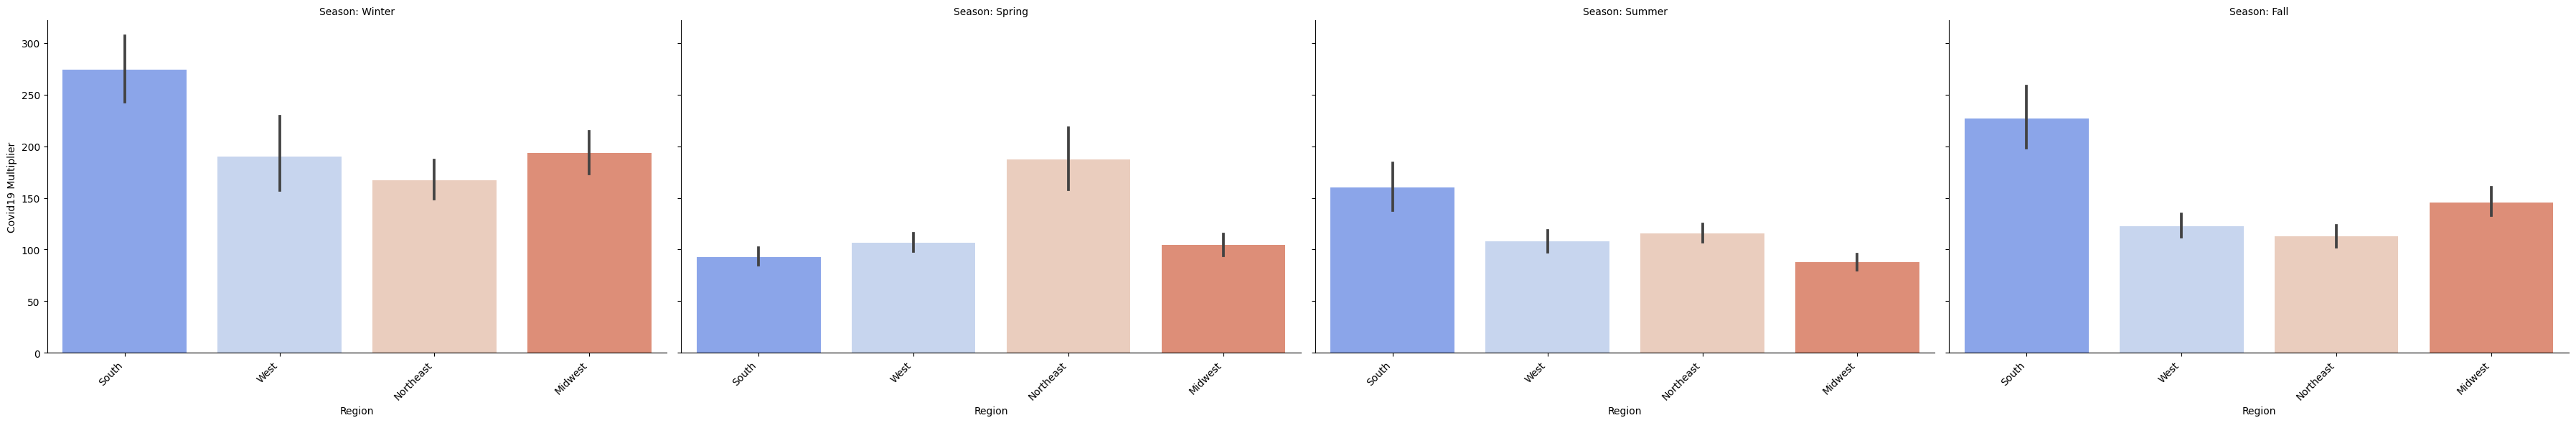

In [ ]:

# Sample data with state abbreviations
state_data = {
    'State': ['Alabama','Nebraska','New Hampshire','New Jersey','New Mexico','New York',
              'New York City','North Carolina','North Dakota','Ohio','Oklahoma','Oregon',
              'Pennsylvania','Rhode Island','South Carolina','South Dakota','Tennessee,Texas',
              'Utah','Vermont','Virginia','Washington','West Virginia','Wisconsin','Wyoming','Nevada',
              'Montana','Alaska','Missouri','Arizona','Arkansas','California','Colorado','Connecticut',
              'Delaware','District of Columbia','Florida','Georgia','Hawaii','Idaho','Illinois','Indiana',
              'Iowa','Kansas','Kentucky','Louisiana','Maine','Maryland','Massachusetts','Michigan','Minnesota','Mississippi']

}

region_mapping = {
    'Connecticut': 'Northeast',
    'Maine': 'Northeast',
    'Massachusetts': 'Northeast',
    'New Hampshire': 'Northeast',
    'Rhode Island': 'Northeast',
    'Vermont': 'Northeast',
    'Delaware': 'Northeast',
    'District of Columbia': 'Northeast',
    'New Jersey': 'Northeast',
    'Maryland': 'Northeast',
    'New York City': 'Northeast',
    'New York': 'Northeast',
    'Pennsylvania': 'Northeast',

    'Illinois': 'Midwest',
    'Indiana': 'Midwest',
    'Iowa': 'Midwest',
    'Kansas': 'Midwest',
    'Michigan': 'Midwest',
    'Minnesota': 'Midwest',
    'Missouri': 'Midwest',
    'Nebraska': 'Midwest',
    'North Dakota': 'Midwest',
    'Ohio': 'Midwest',
    'South Dakota': 'Midwest',
    'Wisconsin': 'Midwest',


    'Alabama': 'South',
    'Arkansas': 'South',
    'Florida': 'South',
    'Georgia': 'South',
    'Kentucky': 'South',
    'Louisiana': 'South',
    'Mississippi': 'South',
    'North Carolina': 'South',
    'South Carolina': 'South',
    'Tennessee': 'South',
    'Oklahoma': 'South',
    'Texas': 'South',

    'Arizona': 'West',
    'California': 'West',
    'Colorado': 'West',
    'Idaho': 'West',
    'Montana': 'West',
    'Nevada': 'West',
    'New Mexico': 'West',
    'Oregon': 'West',
    'Utah': 'West',
    'Washington': 'West',
    'Wyoming': 'West',
    'Virginia': 'West',
    'West Virginia': 'West',
    'Alaska': 'West',
    'Hawaii': 'West',

}


# Removes USA
cleaned_data = cleaned_data[(cleaned_data["Jurisdiction of Occurrence"] != 'United States') &
             (cleaned_data["Jurisdiction of Occurrence"] != 'Puerto Rico')]

# Add a new column 'Region' based on the mapping
cleaned_data['Region'] = cleaned_data['Jurisdiction of Occurrence'].map(region_mapping)

# Print the DataFrame with the added 'Region' column
cleaned_data.head()

# Define a custom color palette with a wider range of colors
custom_palette = sns.color_palette("coolwarm", len(cleaned_data['Region'].unique()))

# Create the categorical plot with customizations and the updated color palette
plot = sns.catplot(data=cleaned_data, x='Region', y='COVID-19 (U071, Multiple Cause of Death)', col='Season', kind='bar',
                   palette=custom_palette, height=6, aspect=1.5)

# Set plot labels and titles
plot.set_axis_labels('Region', 'Covid19 Multiplier')
plot.set_titles('Season: {col_name}')

# Rotate x-axis labels for better readability and include 'Region' in labels
plot.set_xticklabels(rotation=45, horizontalalignment='right')

# Customize the aesthetics of the plot
sns.despine()
plt.tight_layout()

# Save the plot as an image
plot.savefig('catplot_image_appealing.png')

# Display the plot
plt.show()

The visualization presents  the number of deaths due to COVID in the four regions of America, South, West, Northeast, & Midwest, across all four seasons i.e., Winter, Spring, Summer, & Fall.

Key insights:
COVID-19 Trends: While there is no direct study on this matter, it has been a speculation since the beginning that COVID tends to worsen during winters/cold weather, and looking at this plot it is evident that the situation does worsen as seasons get colder,.

This visualization serves as a powerful tool to back the research that has been going into this topic and study how the virus reacts to different temperatures.

There was a similar study conducted on this same matter across Europe and China by a team of scientists and it was able to provide the same inference.

# **Conclusion**

Our exploration into the mortality trends in the United States from 2020 to 2023 reveals critical insights into the health impacts of the COVID-19 pandemic alongside other leading causes of death. The visual analytics employed vividly illustrate the surge in deaths corresponding with key events of the pandemic, showing the huge impact of COVID-19. Moreover, the comparative analysis of various causes of death highlights the persistent threat posed by conditions such as heart disease and malignant neoplasms, reminding us that these chronic conditions continue to claim lives amidst the global focus on COVID-19. The findings of this study serve as a call for sustained, deliberate efforts in healthcare, emphasizing the need for ongoing care, resource allocation, and research across all fronts of disease management and prevention.

# **Challenges**

The execution of this study was not without its challenges. The initial dataset presented substantial gaps, evidenced by a significant proportion of missing values across various disease categories. The task of data cleaning and imputation was not only necessary but also delicate. Furthermore, the unprecedented nature of the COVID-19 pandemic introduced variability and unpredictability into mortality trends, necessitating a flexible yet robust analytical approach. The rapidly evolving landscape of public health during this period, marked by the emergence of new COVID-19 variants and vaccination efforts, added layers of complexity to the data interpretation.


# **Limitations**



While the study provides valuable insights, it is bound by certain limitations. The presence of missing or incomplete data, despite rigorous cleaning, suggests potential biases or underrepresentations in the findings. The reliance on officially reported data also carries the risk of underestimation due to unreported or misclassified cases, particularly in the context of COVID-19 deaths. Additionally, the study's scope, confined to a specific timeframe, does not include an analysis of longer-term trends or the consideration of seasonal variations and their impact on disease and mortality.

# **Next Steps**

The current study, while comprehensive, opens several avenues for further research, essential for a more nuanced understanding of mortality trends and the factors influencing them. Below are proposed next steps and considerations for subsequent studies:

1. Longitudinal Analysis: Extend the scope beyond the 2020-2023 timeframe to include pre-pandemic years, offering a more contrasted view of mortality trends. A longer timeline would allow for the investigation of whether observed trends are anomalies induced by the pandemic or part of broader, more systemic patterns in public health.

2. Demographic and Socioeconomic Data Integration: Incorporate demographic (age, gender, race, etc.) and socioeconomic (income level, education, occupation, etc.) data to explore disparities in mortality rates. Understanding how mortality is influenced by these factors is crucial for targeted public health interventions and resource allocation.

3. Geospatial Analysis: Conduct a more detailed geospatial analysis to identify if there are location-specific trends or anomalies in mortality. This could involve examining urban versus rural areas or analyzing trends at the state or community level.

4. Healthcare System Data: Integrate data on healthcare system characteristics (e.g., hospital capacity, access to care, treatment types available) to study their correlation with mortality trends. This can reveal critical insights into how healthcare system strengths or vulnerabilities impact outcomes.

5. Disease-Specific Studies: Undertake more granular, disease-specific studies to understand the underlying factors contributing to mortality from different causes. For instance, exploring the correlation between chronic disease management programs and mortality trends could offer insights into effective strategies for reducing deaths from these conditions.

6. Pandemic Response Analysis: Analyze data related to COVID-19 response strategies, including lockdowns, public health campaigns, and vaccination rates, to assess their effectiveness and impact on mortality. This could also involve a comparative study with other countries to glean best practices and lessons learned.

7. Data Quality Improvement: Efforts to enhance data collection and reporting standards are necessary to reduce the number of missing or misclassified data points. Collaboration with healthcare providers, medical examiners, and public health agencies can improve the completeness and accuracy of mortality data.

By pursuing these next steps, future research can build on the findings of the current study to provide more holistic, actionable insights that inform public health policies, pandemic response strategies, and healthcare improvements. The integration of diverse data types and multidisciplinary approaches will be paramount in these endeavors.


# **Citations**

"Bar" Bar Charts in Python Plotly.com/python/bar-charts/.Accessed 15 Oct 2023.

Plot "Correlation Matrix" in Python javatpoint.com/plot-correlation-matrix-in-python/. Accesed 14 Oct 2023.

Timothy L and co authors published it online on 8 March 2023.[Seasonal trends in COVID-19 cases, hospitalizations, and mortality in the United States and Europe.](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9994397/).

Reference: https://www.cdc.gov/museum/timeline/covid19.html


Centers for Disease Control and Prevention (CDC). (n.d.). COVID-19 Pandemic Timeline - Monthly Total Deaths (All Cause) from 2020 to 2023. Retrieved from [(https://www.cdc.gov/museum/timeline/covid19.html)]


Plotly. (n.d.). Plotly Express Choropleth Documentation. Retrieved from [(https://plotly.github.io/plotly.py-docs/generated/plotly.express.choropleth.html)]


Plotly. (n.d.). Plotly Choropleth Maps Documentation. Retrieved from [https://plotly.com/python/choropleth-maps/]


Samuel H. Preston, Yana C. Vierboom  (2021). "[Excess mortality in the United States in the 21st century](https://www.pnas.org/doi/10.1073/pnas.2024850118)": A Public Health Study.

"Gen AI" Used Generative AI , Chat-GPT  in https://chat.openai.com/. Accessed 12 Oct 2023.


















# **Use of GenAI**



We have utilized Gen AI (Chat GPT) to assist with rectifying errors, converting code, and enhancing the efficiency of code. Additionally, leveraging Gen AI for improving geo maps is a commendable approach.



* We fixed the logic for the bar graph with the help of GenAI to show all the mortality rates in the top 5 states from the year 2020-2023 in a single graph.

* We have used GenAI to fix few of our codes when we were encountering errors. The geo-spatial map had issues with the format of the dates and the datatypes. Furthermore, we were trying to add all the other diseases columns to this map, therefore, we used GenAI to find a solution. However, we were only able to fix the datatype and date issue but couldn’t fix the code to show all the individual diseases.

